### Problem statement:-

The aim of the project is to predict fraudulent credit card transactions using machine learning models. This is crucial from the bank’s as well as customer’s perspective. The banks cannot afford to lose their customers’ money to fraudsters. Every fraud is a loss to the bank as the bank is responsible for the fraud transactions.

The dataset contains transactions made over a period of two days in September 2013 by European credit cardholders. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. We need to take care of the data imbalance while building the model and come up with the best model by trying various algorithms.


## Steps:-
The steps are broadly divided into below steps. The sub steps are also listed while we approach each of the steps.
1. Reading, understanding and visualising the data
2. Preparing the data for modelling
3. Building the model
4. Evaluate the model

# Importing the libraries


In [1]:
import numpy as np
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

# importing the dataset

In [2]:
url = 'https://kh3-ls-storage.s3.us-east-1.amazonaws.com/Updated Project guide data set/creditcard.csv'
response = requests.get(url)

# Read the CSV file from the response content
df= pd.read_csv(io.StringIO(response.text))

In [3]:
# download this dataset into our machine incsv file

!wget https://kh3-ls-storage.s3.us-east-1.amazonaws.com/Updated+Project+guide+data+set/creditcard.csv


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
df = pd.read_csv('creditcard.csv')


# Exploratory data analysis


1.  Understand the Data Structure
2.  Data Cleaning
3.  Descriptive Statistics
4.  Data Visualization
5.  Feature Engineering




> Add blockquote



## Reading and understanding the data

In [5]:
# Reading the dataset

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.shape

(284807, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.759061e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.251130e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.654937e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.321385e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.649999e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,4.248366e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-3.054600e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,8.777971e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-1.179749e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


# 	Data Cleaning
This might include standardization, handling the missing values and outliers in the data.

1.  handling the missing
2.  outliers treatment
3.  standardization



## Handling missing values

#### Handling missing values in columns

In [9]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


We can see that there is no missing values in any of the columns. Hence, there is no problem with null values in the entire dataset.

### Checking the distribution of the classes

In [10]:
classes = df['Class'].value_counts()
classes

Class
0    284315
1       492
Name: count, dtype: int64

In [11]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

99.83

In [12]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

0.17

We can see that there is only 0.17% frauds. We will take care of the class imbalance later.





# finding the some visual here by ydata-profiling  

In [13]:
! pip install ydata-profiling

  Obtaining dependency information for ydata-profiling from https://files.pythonhosted.org/packages/5f/35/d4a9e004206c217bfe8838a37663c1b53769ab839e853c4c250b73968cea/ydata_profiling-4.9.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pydantic>=2 from https://files.pythonhosted.org/packages/1f/fa/b7f815b8c9ad021c07f88875b601222ef5e70619391ade4a49234d12d278/pydantic-2.8.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/125.2 kB ? eta -:--:--
     ------ --------------------------------- 20.5/125.2 kB ? eta -:--:--
     --------------- --------------------- 51.2/125.2 kB 871.5 kB/s eta 0:00:01
     --------------------------- --------- 92.2/125.2 kB 880.9 kB/s eta 0:00:01
     ------------------------------------ 125.2/125.2 kB 919.5 kB/s eta 0:00:00
  Obtaining dependency information for visions[type_image_path]<0.7.7,>=0.7.5 from https://files.pythonhosted.org/packages/7c/bf/612b24e711ae25dea9af19b9304634b8949faa0b035fad47e8bcadf62f59/

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.3 requires pydantic<2.0, but you have pydantic 2.8.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


In [14]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# plote the graph of class column

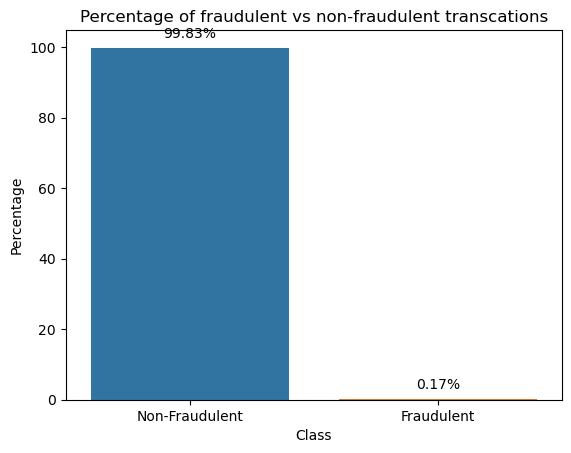

In [22]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]}
df_fraud_percentage = pd.DataFrame(fraud_percentage)
ax = sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.savefig('fraud_percentage.jpg')


# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

## Outliers treatment

We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

### Observe the distribution of classes with time

In [23]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

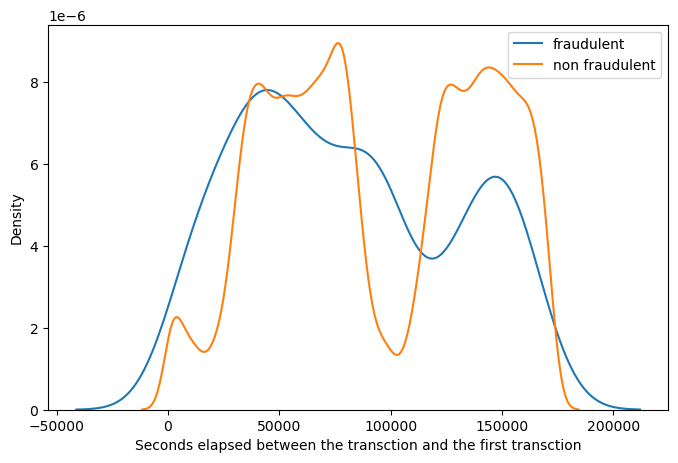

In [24]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.legend()
plt.savefig('time_distribution.jpg')
plt.show()

##### Analysis
We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time.
Hence, we can drop the `Time` column.

In [25]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

### Observe the distribution of classes with amount

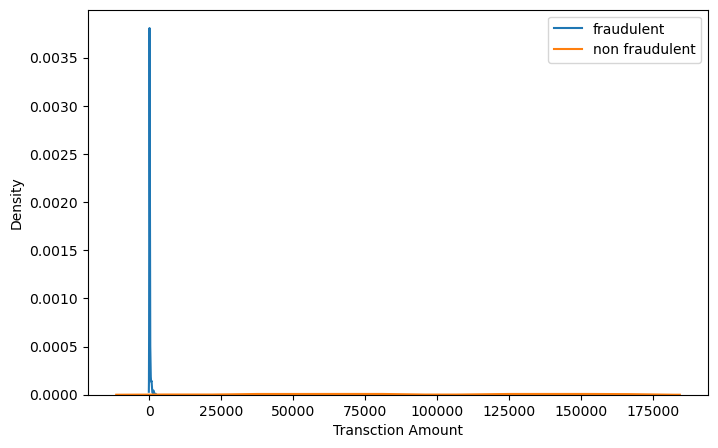

In [26]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.legend()
plt.savefig('amount_distribution.jpg')
plt.show()

##### Analysis
We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

## Train-Test Split

In [27]:
# Import library
from sklearn.model_selection import train_test_split

In [28]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [29]:
# Putting target variable to y
y = df['Class']
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [30]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [31]:
X_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,-0.000032,-0.003944,0.002865,-0.001922,-0.000947,-0.000061,-0.000016,0.000061,-0.001593,-0.000694,...,0.000315,-0.001495,-0.000516,-0.000007,0.000259,-0.000480,-0.000399,-0.000101,-0.000418,88.733311
std,1.958391,1.659644,1.516709,1.418059,1.385690,1.335895,1.245676,1.191435,1.097630,1.087483,...,0.776568,0.728161,0.724876,0.627640,0.605752,0.520881,0.483458,0.404780,0.329417,254.764889
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,-0.919695,-0.599757,-0.889695,-0.850598,-0.692197,-0.768551,-0.553994,-0.208497,-0.644644,-0.534816,...,-0.212236,-0.228820,-0.542981,-0.161710,-0.354146,-0.317318,-0.327610,-0.070976,-0.053185,5.550000
50%,0.017829,0.064061,0.182230,-0.022399,-0.054942,-0.274254,0.040751,0.022129,-0.052279,-0.092870,...,-0.062646,-0.029520,0.006755,-0.011072,0.040956,0.016081,-0.052726,0.001169,0.011169,22.000000
75%,1.315404,0.802870,1.030015,0.741954,0.610316,0.397676,0.569737,0.326789,0.595635,0.454417,...,0.132928,0.185726,0.527264,0.147474,0.439693,0.349880,0.241377,0.091073,0.078237,77.490000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,19.587773,15.594995,23.745136,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


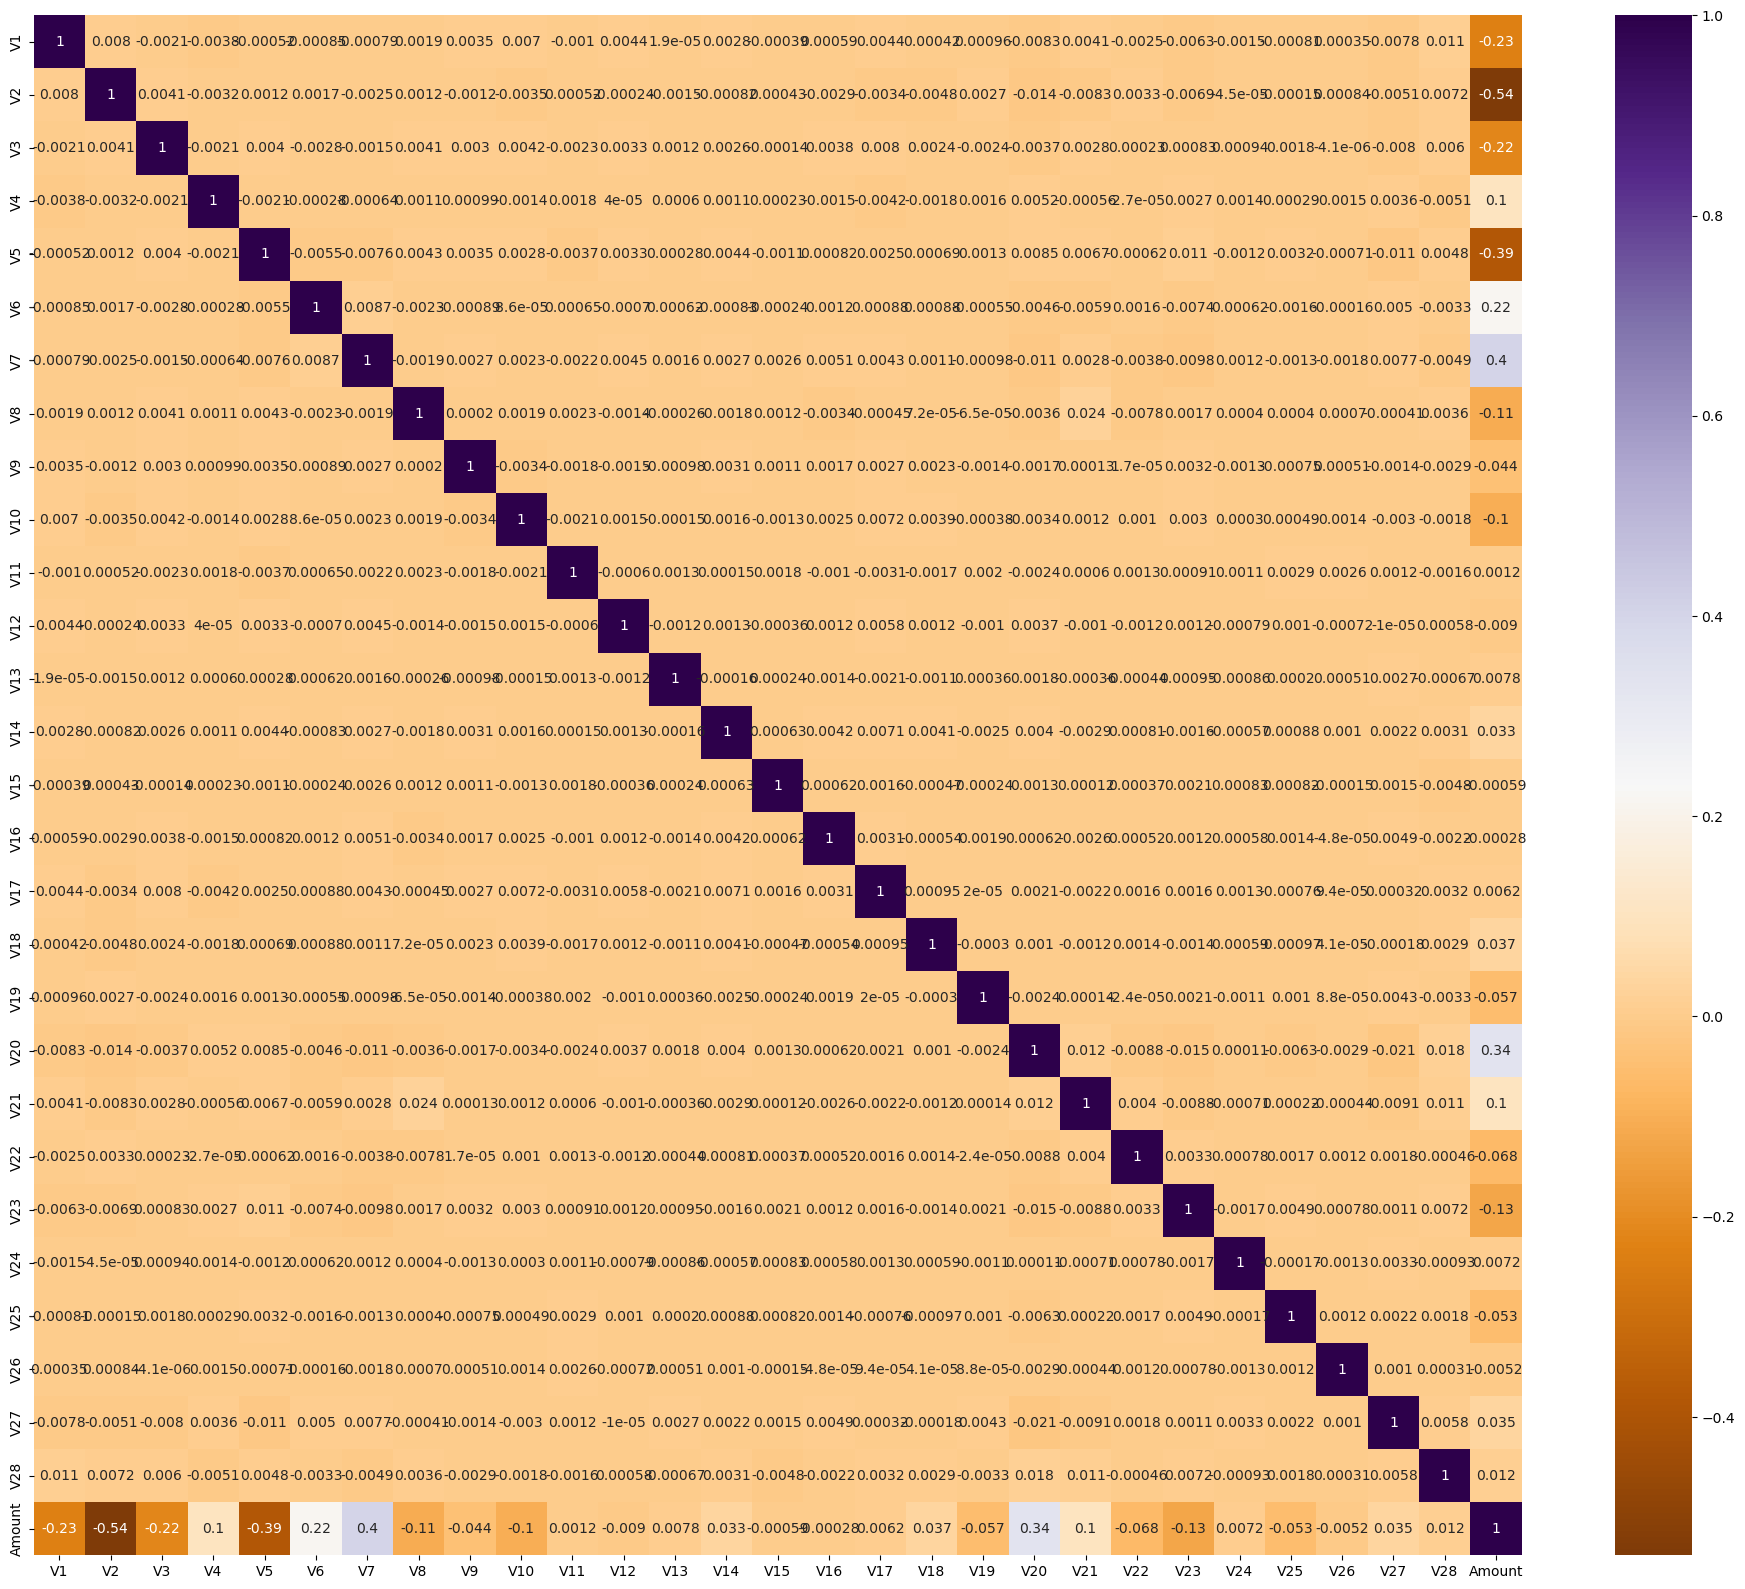

In [32]:
#Using Pearson Correlation
plt.figure(figsize=(24,20))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuOr)
plt.show()

## Feature Scaling
We need to scale only the `Amount` column as all other columns are already scaled by the PCA transformation.

In [33]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [34]:
# Instantiate the Scaler
scaler = StandardScaler()

In [35]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [36]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


##### Scaling the test set
We don't fit scaler on the test set. We only transform the test set.

In [37]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,...,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,...,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,...,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,...,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,...,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


## Checking the Skewness

In [38]:
# Listing the columns
cols = X.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

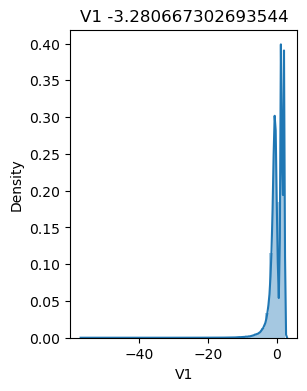

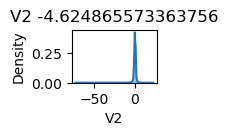

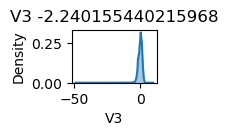

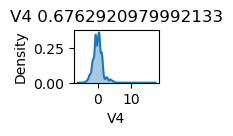

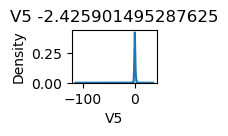

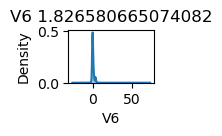

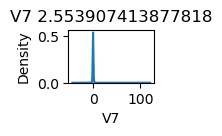

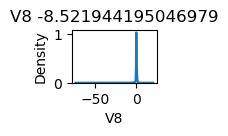

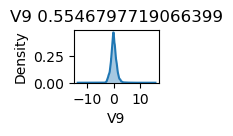

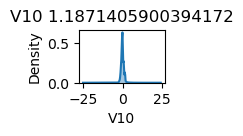

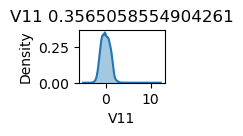

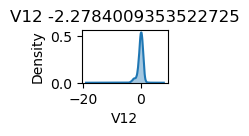

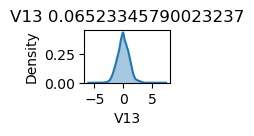

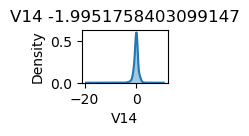

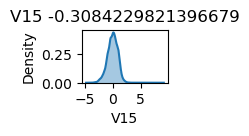

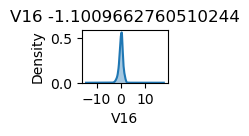

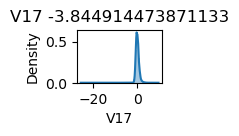

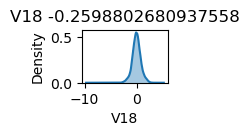

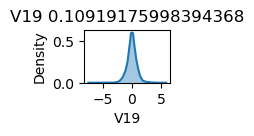

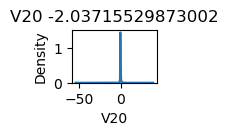

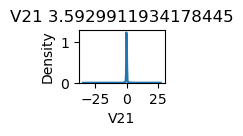

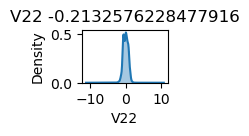

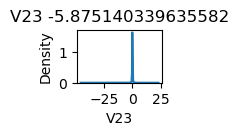

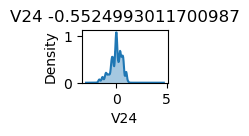

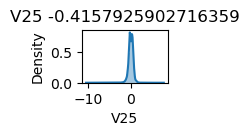

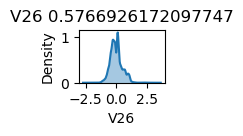

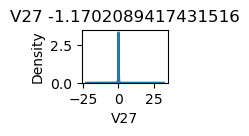

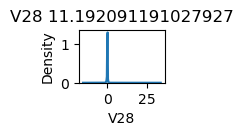

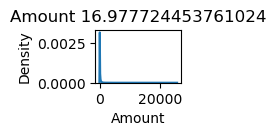

In [39]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X[col])
    plt.title(col+' '+str(X[col].skew()))
    # plt.savefig('distribution.png')
    plt.show()

We see that there are many variables, which are heavily skewed. We will mitigate the skewness only for those variables for bringing them into normal distribution.

### Mitigate skweness with PowerTransformer

In [40]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [41]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

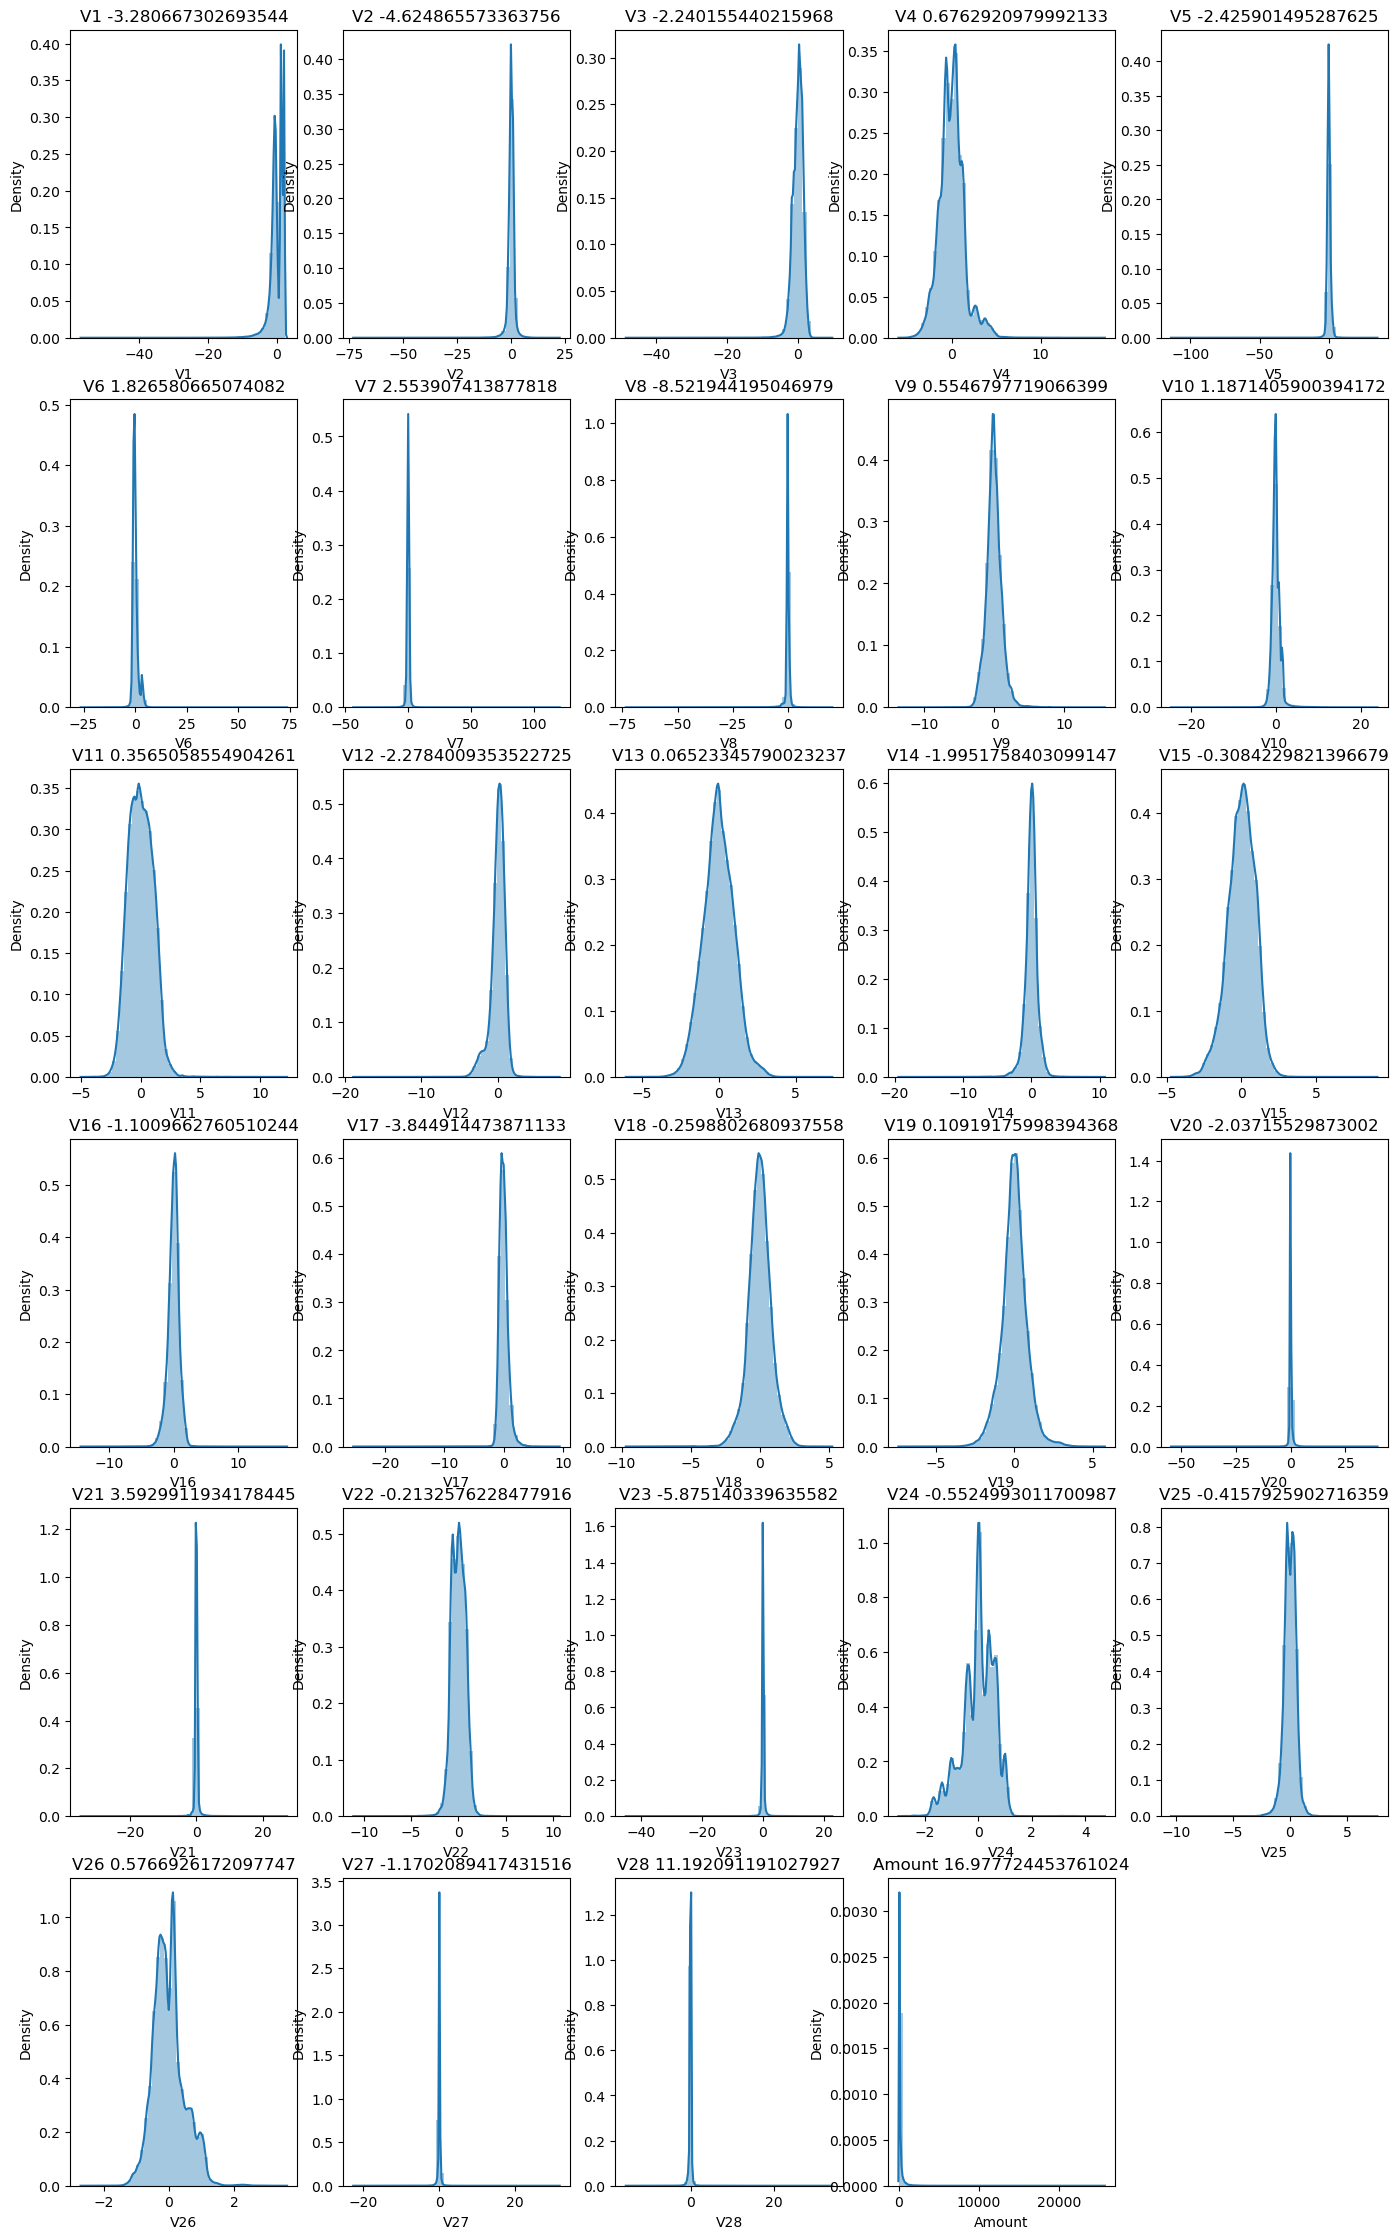

In [42]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X[col])
    plt.title(col+' '+str(X[col].skew()))

In [43]:
desc_stats = X.describe().T[['min', 'mean', 'max']]
desc_stats

,min,mean,max
V1,-56.407510,1.759061e-12,2.454930
V2,-72.715728,-8.251130e-13,22.057729
V3,-48.325589,-9.654937e-13,9.382558
V4,-5.683171,8.321385e-13,16.875344
V5,-113.743307,1.649999e-13,34.801666
V6,-26.160506,4.248366e-13,73.301626
V7,-43.557242,-3.054600e-13,120.589494
V8,-73.216718,8.777971e-14,20.007208
V9,-13.434066,-1.179749e-12,15.594995
V10,-24.588262,7.092545e-13,23.745136


Now we can see that all the variables are normally distributed after the transformation.

### Metric selection for heavily imbalanced data
As we have seen that the data is heavily imbalanced, where only 0.17% transctions are fraudulent, we should not consider Accuracy as a good measure for evaluating the model. Because in the case of all the datapoints return a particular class(1/0) irrespective of any prediction, still the model will result more than 99% Accuracy.

Hence, we have to measure the ROC-AUC score for fair evaluation of the model. The ROC curve is used to understand the strength of the model by evaluating the performance of the model at all the classification thresholds. The default threshold of 0.5 is not always the ideal threshold to find the best classification label of the test point. Because the ROC curve is measured at all thresholds, the best threshold would be one at which the TPR is high and FPR is low, i.e., misclassifications are low. After determining the optimal threshold, we can calculate the F1 score of the classifier to measure the precision and recall at the selected threshold.

#### Why SVM was not tried for model building and Random Forest was not tried for few cases?
In the dataset we have 284807 datapoints and in the case of Oversampling we would have even more number of datapoints. SVM is not very efficient with large number of datapoints beacuse it takes lot of computational power and resources to make the transformation. When we perform the cross validation with K-Fold for hyperparameter tuning, it takes lot of computational resources and it is very time consuming. Hence, because of the unavailablity of the required resources and time SVM was not tried.

For the same reason Random forest was also not tried for model building in few of the hyperparameter tuning for oversampling technique.

#### Why KNN was not used for model building?
KNN is not memory efficient. It becomes very slow as the number of datapoints increases as the model needs to store all the data points. It is computationally heavy because for a single datapoint the algorithm has to calculate the distance of all the datapoints and find the nearest neighbors.

# Handling data imbalance
As we see that the data is heavily imbalanced, We will try several approaches for handling data imbalance.

- Undersampling :- Here for balancing the class distribution, the non-fraudulent transctions count will be reduced to 396 (similar count of fraudulent transctions)
- Oversampling :- Here we will make the same count of non-fraudulent transctions as fraudulent transctions.
- SMOTE :- Synthetic minority oversampling technique. It is another oversampling technique, which uses nearest neighbor algorithm to create synthetic data.
- Adasyn:- This is similar to SMOTE with minor changes that the new synthetic data is generated on the region of low density of imbalanced data points.

## Undersampling

In [44]:
# Importing undersampler library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [45]:
# instantiating the random undersampler
rus = RandomUnderSampler()
# resampling X, y
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [46]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_rus))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 396, 1: 396})


## Model building on balanced data with Undersampling

1.   Logistic Regression
2.   XGBoost
3.  Decision tree




# Impoting metrics

In [47]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

### Logistic Regression m-1

In [48]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

# Importing libraries for cross validation


In [49]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [50]:
# Creating KFold object with 5 splits
def logictic_hyper_parameter(X,y):
    """
this function work as a hyperparameter tuning for logistic regression,
it takes the input in form of x and y and return the best hyperparameter
    Args:
      X:
      y:

    Returns:

    """
    folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
    params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
    model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
    return model_cv.fit(X, y)




In [51]:
hyper_parameter=logictic_hyper_parameter(X_rus,y_rus)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [52]:
# results of grid search CV
cv_results = pd.DataFrame(hyper_parameter.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022998,0.016861,0.006200,0.002481,0.01,{'C': 0.01},0.980445,0.993985,0.972756,0.978836,...,0.982981,0.007537,1,0.988776,0.986403,0.990636,0.989381,0.988263,0.988692,0.001392
1,0.009000,0.001414,0.003400,0.001020,0.1,{'C': 0.1},0.975517,0.992719,0.971154,0.978034,...,0.981293,0.008214,2,0.990484,0.988330,0.994238,0.991800,0.990463,0.991063,0.001939
2,0.010201,0.001601,0.002999,0.000002,1,{'C': 1},0.973609,0.992403,0.961058,0.973866,...,0.977802,0.011244,3,0.991382,0.989069,0.995890,0.993074,0.991548,0.992193,0.002248
3,0.016400,0.004240,0.003990,0.001258,10,{'C': 10},0.970429,0.991770,0.951442,0.970659,...,0.974185,0.014197,4,0.992011,0.989258,0.996139,0.993213,0.991429,0.992410,0.002263
4,0.015801,0.003430,0.003200,0.000748,100,{'C': 100},0.970429,0.991295,0.949359,0.969216,...,0.973288,0.014743,5,0.991921,0.989248,0.996049,0.993084,0.991160,0.992293,0.002255
5,0.016798,0.003370,0.003400,0.001357,1000,{'C': 1000},0.970111,0.991295,0.949359,0.968735,...,0.973128,0.014783,6,0.991991,0.989218,0.996019,0.993024,0.991130,0.992277,0.002250


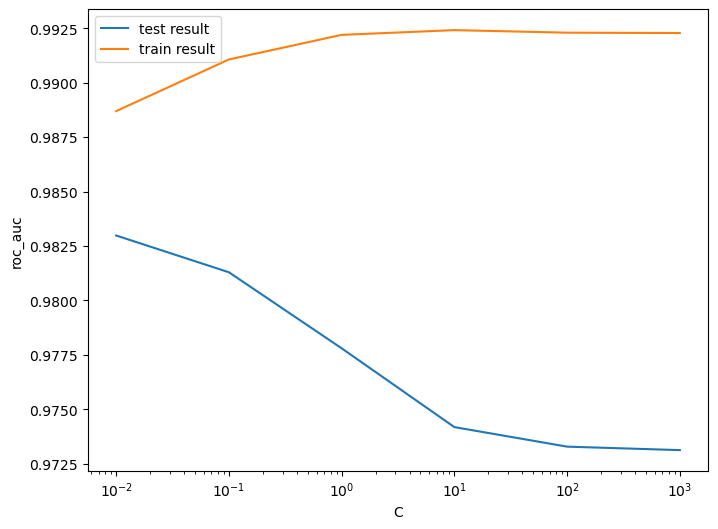

In [53]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [54]:
# Best score with best C
best_score = hyper_parameter.best_score_
best_C = hyper_parameter.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9829805828183034 at C = 0.01


#### Logistic regression with optimal C

In [55]:
# Instantiate the model with best C
logistic_bal_rus = LogisticRegression(C=0.01)

In [56]:
# Fit the model on the train set
logistic_bal_rus_model = logistic_bal_rus.fit(X_train, y_train)

##### Prediction on the train set

In [57]:
# Predictions on the train set
y_train_pred = logistic_bal_rus_model.predict(X_train)

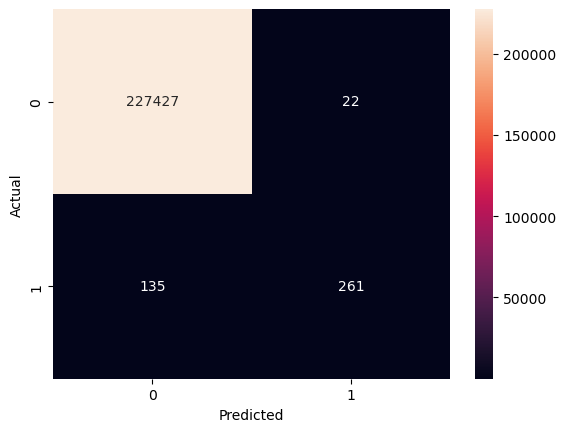

[[227427     22]
 [   135    261]]


In [58]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(confusion)

In [59]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [60]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9993109350655051
Sensitivity:- 0.6590909090909091
Specificity:- 0.9999032750198946
F1-Score:- 0.7687776141384388


In [61]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.92      0.66      0.77       396

    accuracy                           1.00    227845
   macro avg       0.96      0.83      0.88    227845
weighted avg       1.00      1.00      1.00    227845



In [62]:
# Predicted probability
y_train_pred_proba = logistic_bal_rus_model.predict_proba(X_train)[:,1]

In [63]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9850627519962183

In [64]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

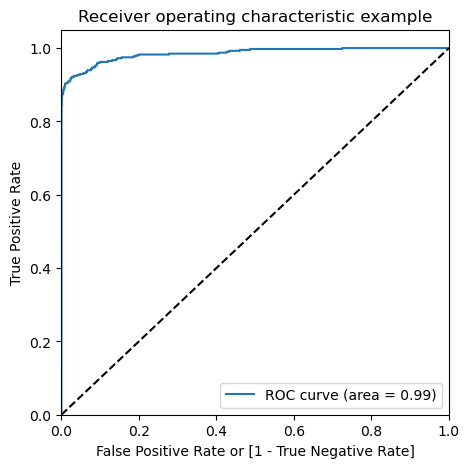

In [65]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

# Prediction on the test set

In [66]:
# Prediction on the test set
y_test_pred = logistic_bal_rus_model.predict(X_test)

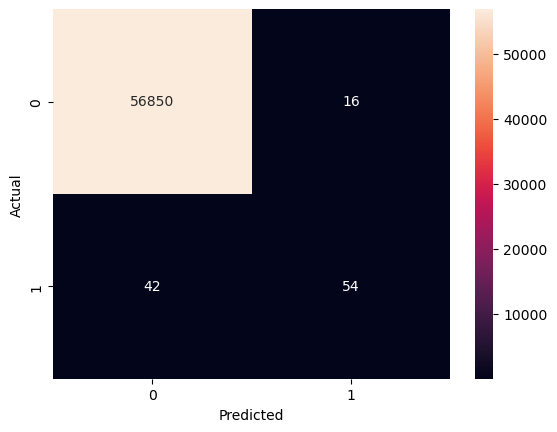

[[56850    16]
 [   42    54]]


In [67]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(confusion)

In [68]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [69]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9989817773252344
Sensitivity:- 0.5625
Specificity:- 0.9997186367952731


In [70]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



In [71]:
# Predicted probability
y_test_pred_proba = logistic_bal_rus_model.predict_proba(X_test)[:,1]

In [72]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9668121475632775

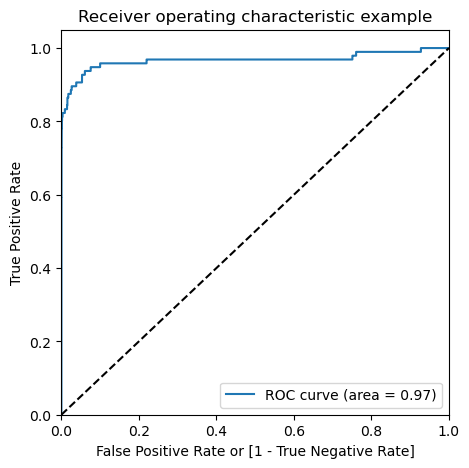

In [73]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary Logistic-1***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 0.69
    - Specificity = 0.99
    - ROC = 0.98
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.59
    - Specificity = 0.99
    - ROC = 0.97

### XGBoost M-2

In [74]:
# Importing XGBoost
from xgboost import XGBClassifier

In [75]:
# hyperparameter tuning with XGBoost

# creating a KFold object
def Xgboost_hyper_parameter(X,y):
    """
    this function is work as a hyperparameter tuning for XGBoost,
    it takes the input in form of x and y and return the best hyperparameter

    Args:
      X:
      y:

    Returns:

    """
    folds = 3

# specify range of hyperparameters
    param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
    xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
    model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
    return model_cv.fit(X,y)


In [76]:
hyper_parameter=Xgboost_hyper_parameter(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [77]:
hyper_parameter

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [78]:
# cv results
cv_results = pd.DataFrame(hyper_parameter.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.868747,0.512184,0.093335,0.000472,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.975585,0.974595,0.980946,0.977042,0.002790,1,0.999865,0.999600,0.999272,0.999579,0.000243
1,2.577503,0.047483,0.101002,0.008525,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.972484,0.976596,0.978129,0.975736,0.002383,2,0.999963,0.999952,0.999955,0.999957,0.000005
2,3.441176,0.230129,0.135665,0.016577,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.974963,0.972600,0.979148,0.975570,0.002707,3,0.999963,0.999971,0.999945,0.999960,0.000011
3,3.340611,0.150208,0.131000,0.004319,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.955029,0.953863,0.971355,0.960083,0.007985,6,0.999998,0.999997,0.999995,0.999997,0.000001
4,3.547326,0.119410,0.126665,0.002624,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.974179,0.970199,0.974645,0.973008,0.001995,4,1.000000,1.000000,1.000000,1.000000,0.000000
5,3.713301,0.238795,0.137333,0.006234,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.968630,0.972430,0.975082,0.972047,0.002648,5,1.000000,1.000000,1.000000,1.000000,0.000000


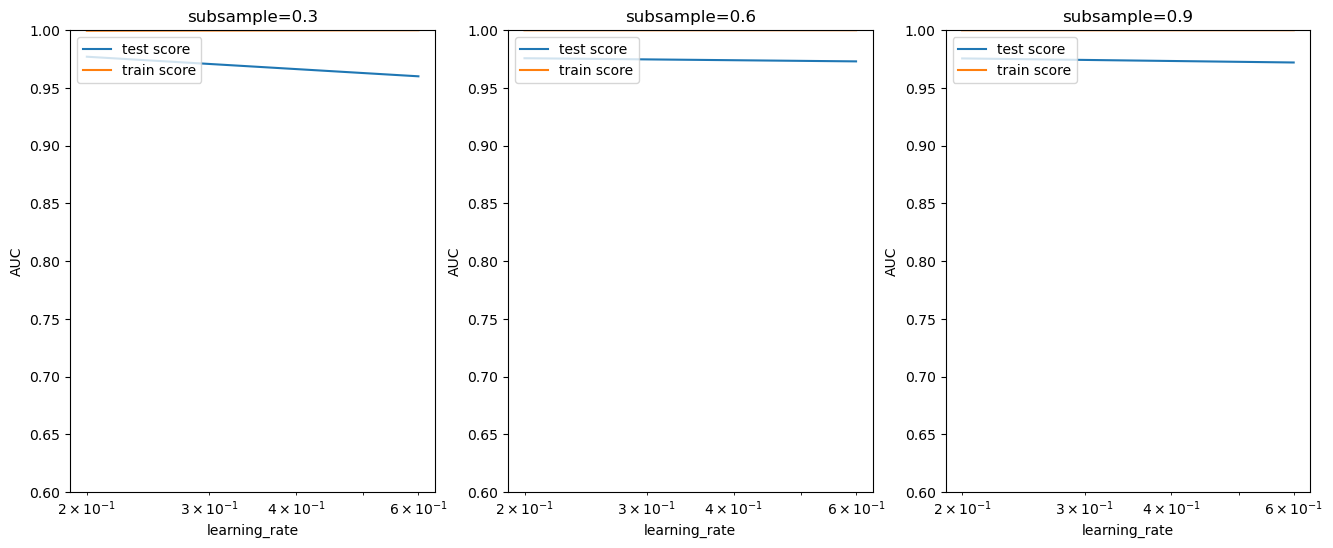

In [79]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [80]:
hyper_parameter.best_params_

{'learning_rate': 0.2, 'subsample': 0.3}

In [81]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_rus_model = XGBClassifier(params = params)
xgb_bal_rus_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3}, ...)

# Prediction on the train set

In [82]:
# Predictions on the train set
y_train_pred = xgb_bal_rus_model.predict(X_train)

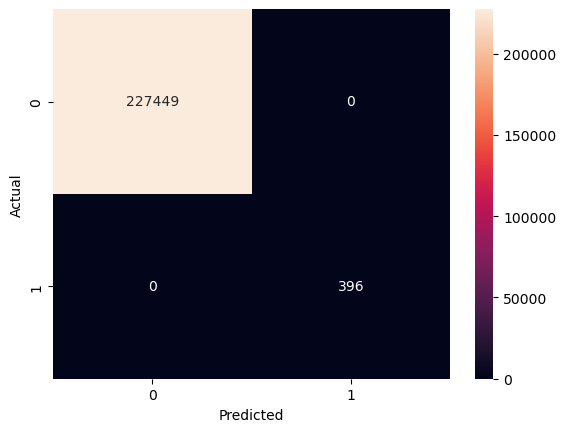

[[227449      0]
 [     0    396]]


In [83]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(confusion)

In [84]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [85]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0


In [86]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       396

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [87]:
# Predicted probability
y_train_pred_proba = xgb_bal_rus_model.predict_proba(X_train)[:,1]

In [88]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

1.0

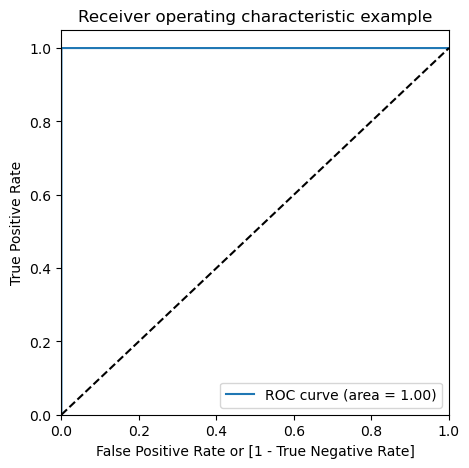

In [89]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

##### Prediction on the test set

In [90]:
# Predictions on the test set
y_test_pred = xgb_bal_rus_model.predict(X_test)

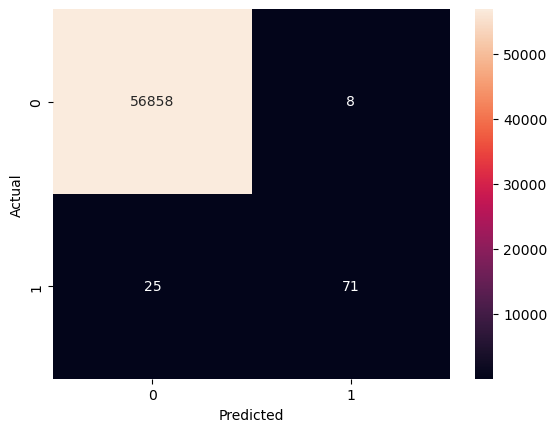

[[56858     8]
 [   25    71]]


In [91]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(confusion)

In [92]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [93]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.999420666409185
Sensitivity:- 0.7395833333333334
Specificity:- 0.9998593183976365


In [94]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.90      0.74      0.81        96

    accuracy                           1.00     56962
   macro avg       0.95      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [95]:
# Predicted probability
y_test_pred_proba = xgb_bal_rus_model.predict_proba(X_test)[:,1]

In [96]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9723599118981465

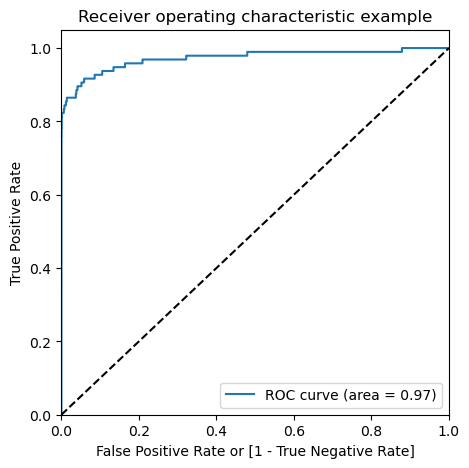

In [97]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary xgboost-1 ***

- Train set
    - Accuracy = 1.0
    - Sensitivity = 1.0
    - Specificity = 1.0
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.73
    - Specificity = *0.99*
    - ROC-AUC = 0.97

### Decision Tree M-3

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
# Create the parameter grid
def decision_tree_parameter(X,y):
    """
    this function is work as a hyperparameter tuning for decision tree,
    it takes the input in form of x and y and return the best hyperparameter

    Args:
      X:
      y:

    Returns:

    """
    param_grid = {
     'max_depth': range(5, 15, 5),
     'min_samples_leaf': range(50, 150, 50),
      'min_samples_split': range(50, 150, 50),
     }


# Instantiate the grid search model
    dtree = DecisionTreeClassifier()

    grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
    return grid_search.fit(X,y)



In [100]:
dt_prameter=decision_tree_parameter(X_rus,y_rus)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [101]:
dt_prameter

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [102]:
# cv results
cv_results = pd.DataFrame(dt_prameter.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009001,2.829346e-03,0.003334,0.000471,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.958161,0.960486,0.958219,0.958955,0.001082,4
1,0.006998,6.257699e-07,0.003001,0.000003,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.958046,0.960486,0.965220,0.961251,0.002978,2
2,0.006330,4.712590e-04,0.003016,0.000018,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.948864,0.946740,0.940915,0.945506,0.003360,7
3,0.005662,4.671580e-04,0.002987,0.000016,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.948864,0.946740,0.939939,0.945181,0.003807,8
4,0.006666,4.728321e-04,0.002666,0.000471,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.960973,0.960486,0.962867,0.961442,0.001027,1
5,0.006682,4.787484e-04,0.002667,0.000940,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.959596,0.960486,0.959194,0.959759,0.000540,3
6,0.005655,4.567212e-04,0.002678,0.000480,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.948864,0.946740,0.953111,0.949571,0.002648,5
7,0.005651,4.634520e-04,0.003002,0.000003,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.948864,0.946740,0.952106,0.949237,0.002207,6


In [103]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", dt_prameter.best_score_)
print(dt_prameter.best_estimator_)

Best roc_auc:- 0.9614420722375266
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [104]:
# Model with optimal hyperparameters
dt_bal_rus_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=5,
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_rus_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [105]:
# Predictions on the train set
y_train_pred = dt_bal_rus_model.predict(X_train)

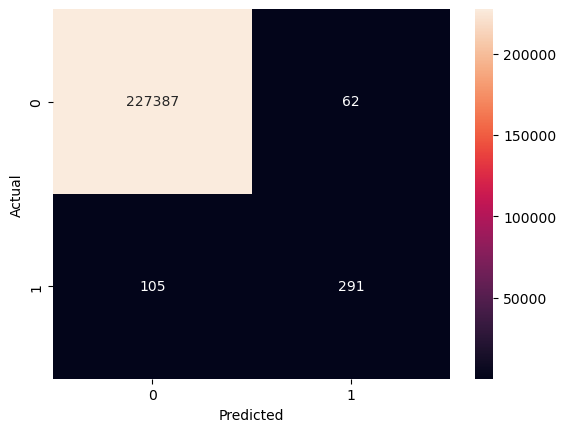

[[227387     62]
 [   105    291]]


In [106]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(confusion)

In [107]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [108]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9992670455792315
Sensitivity:- 0.7348484848484849
Specificity:- 0.9997274114197029


In [109]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.82      0.73      0.78       396

    accuracy                           1.00    227845
   macro avg       0.91      0.87      0.89    227845
weighted avg       1.00      1.00      1.00    227845



In [110]:
# Predicted probability
y_train_pred_proba = dt_bal_rus_model.predict_proba(X_train)[:,1]

In [111]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9536187954844445

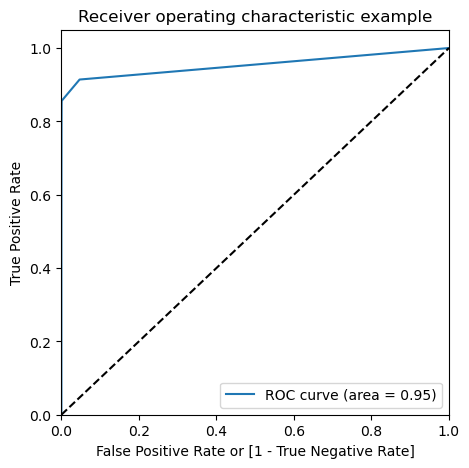

In [112]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

##### Prediction on the test set

In [113]:
# Predictions on the test set
y_test_pred = dt_bal_rus_model.predict(X_test)

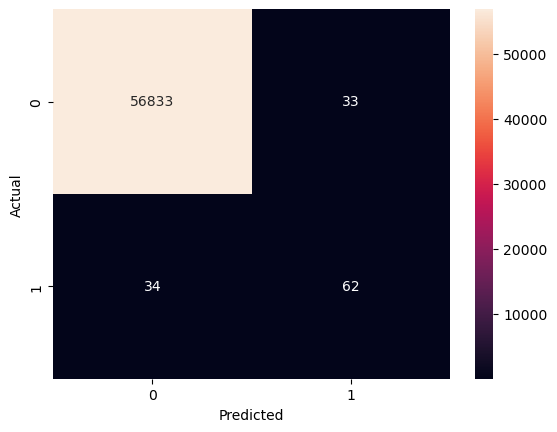

[[56833    33]
 [   34    62]]


In [114]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(confusion)

In [115]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [117]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9988237772550121
Sensitivity:- 0.6458333333333334
Specificity:- 0.9994196883902507


In [118]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.65      0.65        96

    accuracy                           1.00     56962
   macro avg       0.83      0.82      0.82     56962
weighted avg       1.00      1.00      1.00     56962



In [119]:
# Predicted probability
y_test_pred_proba = dt_bal_rus_model.predict_proba(X_test)[:,1]

In [120]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9219403033740138

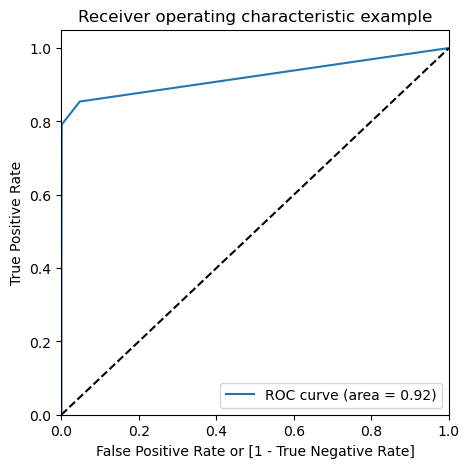

In [121]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary Decision Tree-1***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 0.73
    - Specificity = 0.99
    - ROC-AUC = 0.98
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.64
    - Specificity = 0.99
    - ROC-AUC = 0.92

# Oversampling

In [122]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler

In [123]:
# instantiating the random oversampler
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [124]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227449})


### Logistic Regression

In [125]:
over_hyer_parameter=logictic_hyper_parameter(X_train_ros,y_train_ros)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [126]:
# results of grid search CV
cv_results = pd.DataFrame(over_hyer_parameter.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.604999,0.149750,0.056398,0.010343,0.01,{'C': 0.01},0.988879,0.988577,0.988360,0.988504,...,0.988487,0.000251,6,0.988427,0.988414,0.988540,0.988588,0.988532,0.988500,0.000068
1,1.662806,0.038037,0.059793,0.010458,0.1,{'C': 0.1},0.988892,0.988592,0.988384,0.988506,...,0.988499,0.000252,3,0.988441,0.988425,0.988550,0.988601,0.988543,0.988512,0.000068
2,1.470607,0.174296,0.050198,0.008134,1,{'C': 1},0.988888,0.988591,0.988389,0.988506,...,0.988499,0.000250,4,0.988441,0.988426,0.988549,0.988602,0.988544,0.988512,0.000068
3,1.591601,0.120389,0.056009,0.015663,10,{'C': 10},0.988887,0.988592,0.988389,0.988506,...,0.988499,0.000250,5,0.988441,0.988426,0.988549,0.988602,0.988544,0.988512,0.000068
4,1.511008,0.052921,0.051593,0.006963,100,{'C': 100},0.988888,0.988592,0.988389,0.988506,...,0.988499,0.000250,1,0.988441,0.988426,0.988549,0.988602,0.988544,0.988512,0.000068
5,1.296603,0.053755,0.048206,0.009367,1000,{'C': 1000},0.988888,0.988592,0.988389,0.988506,...,0.988499,0.000250,1,0.988441,0.988426,0.988549,0.988602,0.988544,0.988512,0.000068


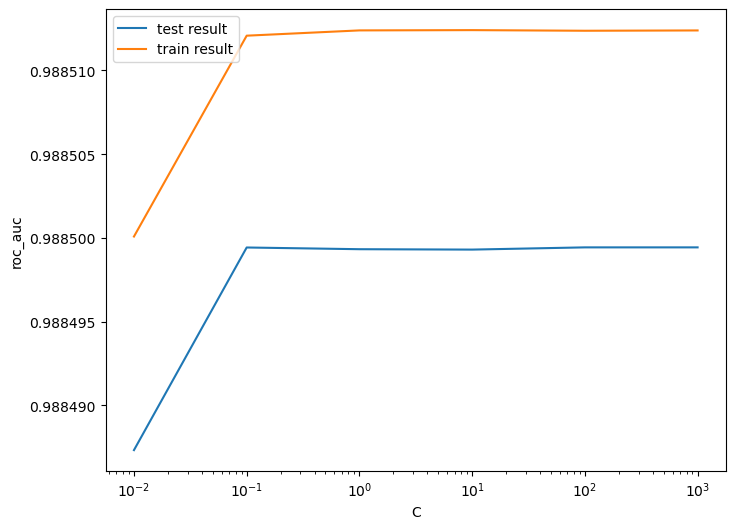

In [127]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [128]:
# Best score with best C
best_score = over_hyer_parameter.best_score_
best_C =over_hyer_parameter.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9884994297722987 at C = 100


#### Logistic regression with optimal C

In [129]:
# Instantiate the model with best C
logistic_bal_ros = LogisticRegression(C=0.01)

In [130]:
# Fit the model on the train set
logistic_bal_ros_model = logistic_bal_ros.fit(X_train_ros, y_train_ros)

##### Prediction on the train set

In [131]:
# Predictions on the train set
y_train_pred = logistic_bal_ros_model.predict(X_train_ros)

[[222367   5082]
 [ 17836 209613]]


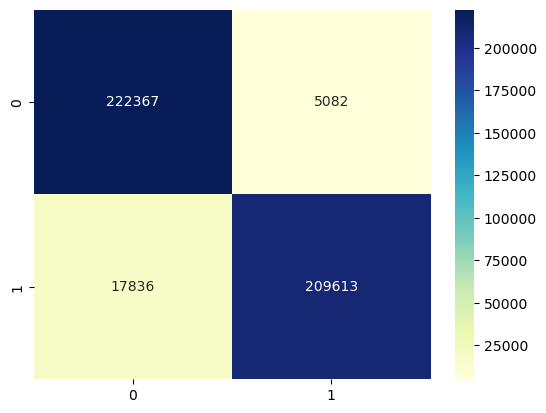

In [132]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu')
print(confusion)

In [133]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [134]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_ros, y_train_pred))

Accuracy:- 0.9496194751350853
Sensitivity:- 0.9215824206745249
Specificity:- 0.9776565295956456
F1-Score:- 0.9481662082941305


In [135]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



In [136]:
# Predicted probability
y_train_pred_proba = logistic_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [137]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9885006424696212

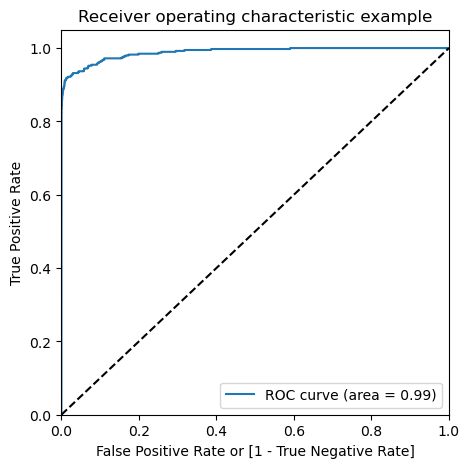

In [138]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

#### Prediction on the test set

In [139]:
# Prediction on the test set
y_test_pred = logistic_bal_ros_model.predict(X_test)

<Axes: >

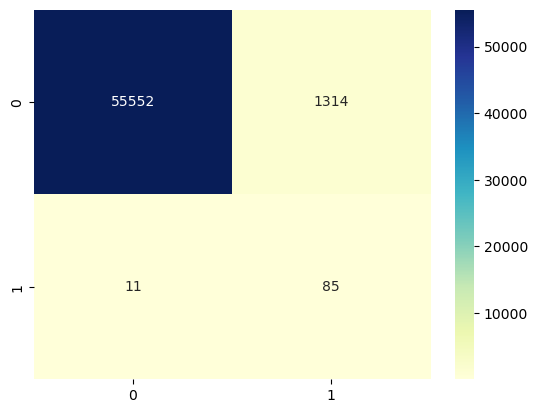

In [140]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu')
# print(confusion)

In [141]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [142]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1-Score - Use y_test and y_test_pred as you are evaluating on test data
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9767388785506127
Sensitivity:- 0.8854166666666666
Specificity:- 0.9768930468118032
F1-Score:- 0.11371237458193979


In [143]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [144]:
# Predicted probability
y_test_pred_proba = logistic_bal_ros_model.predict_proba(X_test)[:,1]

In [145]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9709183834218456

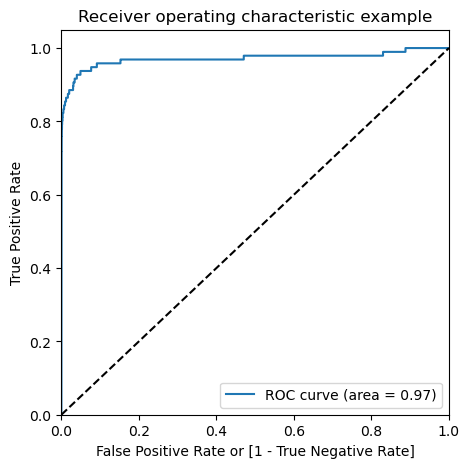

In [146]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary Logistic Regression-2***


- Train set
    - Accuracy = 0.95
    - Sensitivity = 0.92
    - Specificity = 0.97
    - ROC = 0.97
- Test set
    - Accuracy = 0.94
    - Sensitivity = 0.92
    - Specificity = 0.97
    - ROC = 0.97

### XGBoost

# hyper perameter tuning

In [147]:
over_hyer_parameter=Xgboost_hyper_parameter(X_train_ros,y_train_ros)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [148]:
# cv results
cv_results = pd.DataFrame(over_hyer_parameter.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,5.559902,0.288082,0.219667,0.007133,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999914,0.999903,0.999885,0.999901,0.000012,6,0.999920,0.999907,0.999911,0.999913,5.326327e-06
1,5.504529,0.157051,0.232664,0.003298,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999913,0.999915,0.999900,0.999909,0.000007,4,0.999913,0.999918,0.999925,0.999918,4.750749e-06
2,6.092983,0.296555,0.249180,0.025758,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999902,0.999915,0.999896,0.999905,0.000008,5,0.999912,0.999914,0.999920,0.999915,3.192349e-06
3,5.223989,0.133158,0.238838,0.008789,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999989,0.999985,0.999978,0.999984,0.000004,2,0.999998,0.999997,0.999998,0.999998,2.080542e-07
4,5.352296,0.328770,0.236001,0.009201,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999990,0.999991,0.999974,0.999985,0.000008,1,0.999994,0.999998,0.999995,0.999996,1.729882e-06
5,5.069981,0.013415,0.235001,0.008640,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999980,0.999993,0.999914,0.999962,0.000035,3,0.999997,0.999997,0.999969,0.999988,1.276911e-05


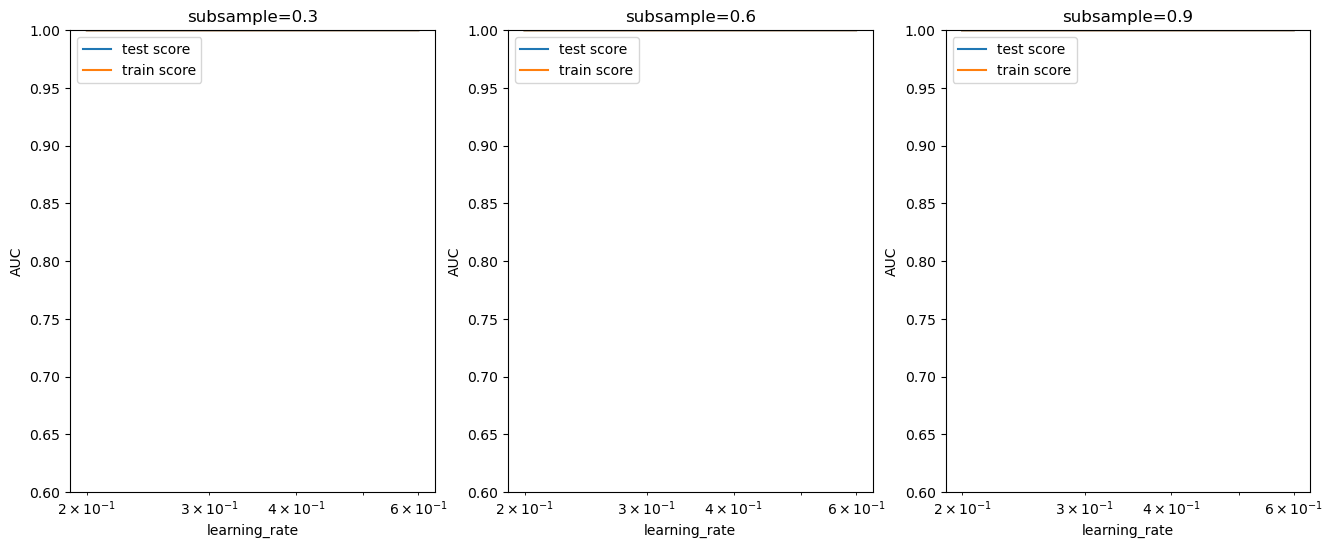

In [149]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [150]:
over_hyer_parameter.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [151]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_ros_model = XGBClassifier(params = params)
xgb_bal_ros_model.fit(X_train_ros, y_train_ros)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

##### Prediction on the train set

In [152]:
# Predictions on the train set
y_train_pred = xgb_bal_ros_model.predict(X_train_ros)

[[227449      0]
 [     0 227449]]


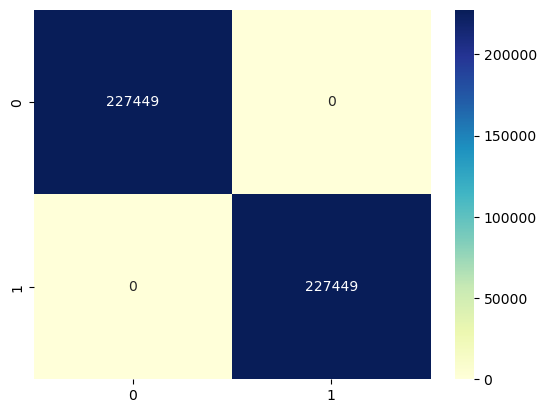

In [153]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_ros)
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu')
print(confusion)

In [154]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [155]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0


In [156]:
  # classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [157]:
# Predicted probability
y_train_pred_proba = xgb_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [158]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

1.0

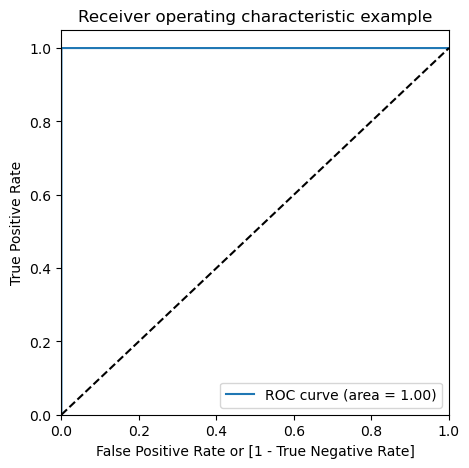

In [159]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

##### Prediction on the test set

In [160]:
# Predictions on the test set
y_test_pred = xgb_bal_ros_model.predict(X_test)

[[56856    10]
 [   22    74]]


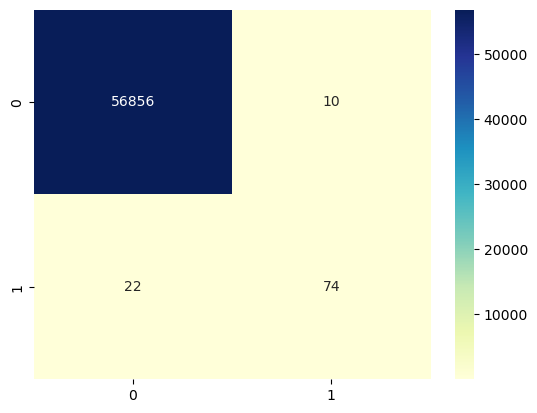

In [161]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu')
print(confusion)

In [162]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [163]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9994382219725431
Sensitivity:- 0.7708333333333334
Specificity:- 0.9998241479970457


In [164]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.77      0.82        96

    accuracy                           1.00     56962
   macro avg       0.94      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [165]:
# Predicted probability
y_test_pred_proba = xgb_bal_ros_model.predict_proba(X_test)[:,1]

In [166]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9711033027937023

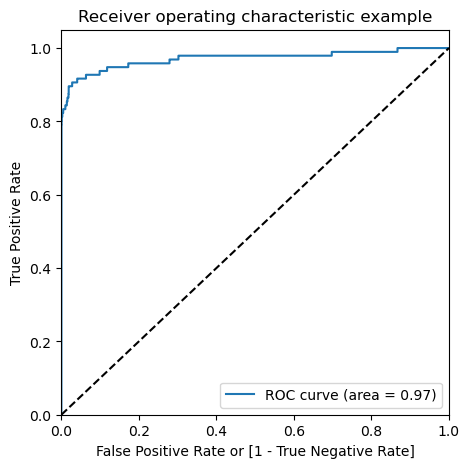

In [167]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary XGBoost-2***

- Train set
    - Accuracy = 1.0
    - Sensitivity = 1.0
    - Specificity = 1.0
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.77
    - Specificity = 0.99
    - ROC-AUC = 0.99

### Decision Tree

In [168]:
over_hyer_parameter=decision_tree_parameter(X_train_ros,y_train_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [169]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [170]:
# cv results
cv_results = pd.DataFrame(over_hyer_parameter.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.373190,0.096020,0.074693,0.006154,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.983591,0.983385,0.989972,0.985649,0.003058,5
1,4.490869,0.267698,0.068001,0.000002,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.983591,0.983382,0.989946,0.985640,0.003046,6
2,4.622039,0.258902,0.075667,0.010874,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.983580,0.983311,0.989869,0.985587,0.003030,8
3,4.117536,0.006703,0.069017,0.001634,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.983582,0.983301,0.989880,0.985587,0.003037,7
4,6.389212,0.063495,0.069665,0.001701,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999553,0.999611,0.999592,0.999585,0.000024,1
5,6.381002,0.078797,0.069670,0.000942,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999542,0.999587,0.999583,0.999571,0.000020,3
6,6.373170,0.031956,0.068989,0.000018,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999539,0.999688,0.999529,0.999585,0.000073,2
7,6.366731,0.048650,0.070327,0.000477,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999539,0.999652,0.999506,0.999566,0.000062,4


In [171]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", over_hyer_parameter.best_score_)
print(over_hyer_parameter.best_estimator_)

Best roc_auc:- 0.9995852213997777
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [172]:
# Model with optimal hyperparameters
dt_bal_ros_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_ros_model.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [173]:
# Predictions on the train set
y_train_pred = dt_bal_ros_model.predict(X_train_ros)

[[225304   2145]
 [     0 227449]]


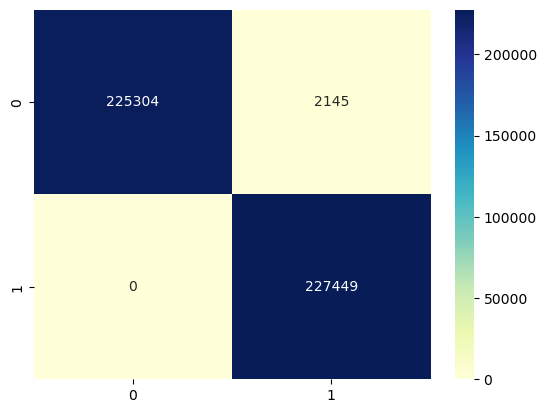

In [174]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu')
print(confusion)

In [175]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [176]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9952846572198603
Sensitivity:- 1.0
Specificity:- 0.9905693144397205


In [177]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227449
           1       0.99      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [178]:
# Predicted probability
y_train_pred_proba = dt_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [179]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9996677245146549

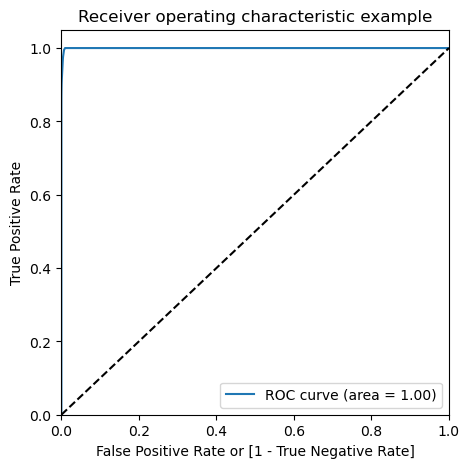

In [180]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

##### Prediction on the test set

In [181]:
# Predictions on the test set
y_test_pred = dt_bal_ros_model.predict(X_test)

[[56284   582]
 [   21    75]]


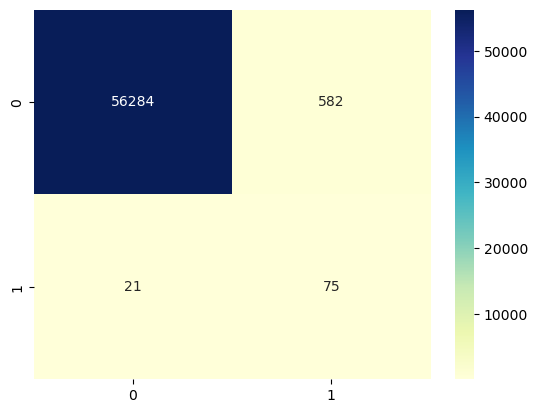

In [182]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu')
print(confusion)

In [183]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [184]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.989413995295109
Sensitivity:- 0.78125
Specificity:- 0.9897654134280589


In [185]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.11      0.78      0.20        96

    accuracy                           0.99     56962
   macro avg       0.56      0.89      0.60     56962
weighted avg       1.00      0.99      0.99     56962



In [186]:
# Predicted probability
y_test_pred_proba = dt_bal_ros_model.predict_proba(X_test)[:,1]

In [187]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.8892545450415597

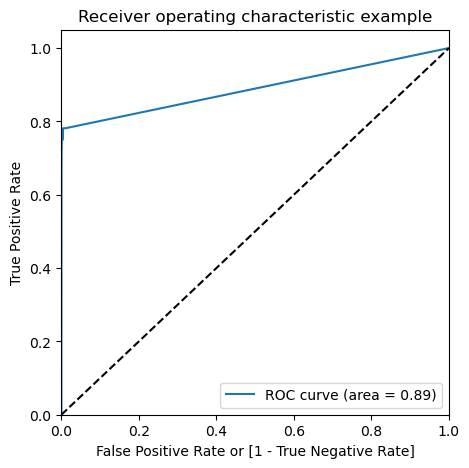

In [188]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary Decision Tree-2***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 0.99
    - ROC-AUC = 1
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.79
    - Specificity = 0.99
    - ROC-AUC = 89

## SMOTE (Synthetic Minority Oversampling Technique)

We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [189]:
# Importing SMOTE

from imblearn.over_sampling import SMOTE

In [190]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train) # Use fit_resample instead of fit_sample


In [191]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (227845, 29)
After SMOTE oversampling X_train shape= (454898, 29)


### Logistic Regression

In [192]:
smote_hyper_parameter=logictic_hyper_parameter(X_train_smote,y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [193]:
# results of grid search CV
cv_results = pd.DataFrame(smote_hyper_parameter.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.274811,0.067351,0.053192,0.011592,0.01,{'C': 0.01},0.989805,0.989796,0.989484,0.989631,...,0.989725,0.000150,6,0.989758,0.989666,0.989760,0.989841,0.989682,0.989741,0.000063
1,1.289905,0.116554,0.055544,0.007422,0.1,{'C': 0.1},0.989834,0.989807,0.989488,0.989632,...,0.989741,0.000161,1,0.989780,0.989686,0.989772,0.989853,0.989700,0.989758,0.000060
2,1.313801,0.076743,0.053199,0.005192,1,{'C': 1},0.989836,0.989807,0.989486,0.989630,...,0.989741,0.000162,2,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060
3,1.264599,0.058345,0.055402,0.007418,10,{'C': 10},0.989836,0.989807,0.989486,0.989630,...,0.989741,0.000163,5,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060
4,1.252999,0.029744,0.053801,0.006402,100,{'C': 100},0.989836,0.989807,0.989486,0.989630,...,0.989741,0.000163,3,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060
5,1.212802,0.039869,0.047201,0.003545,1000,{'C': 1000},0.989836,0.989807,0.989486,0.989630,...,0.989741,0.000163,4,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060


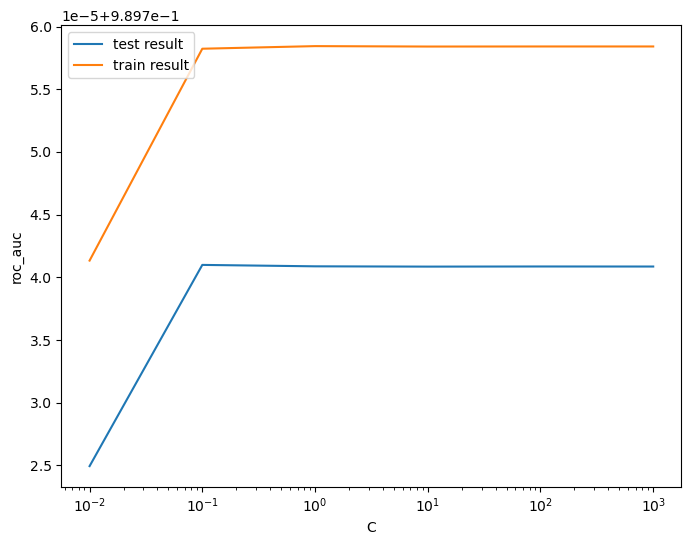

In [194]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [195]:
# Best score with best C
best_score = smote_hyper_parameter.best_score_
best_C = smote_hyper_parameter.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9897409900830768 at C = 0.1


#### Logistic regression with optimal C

In [196]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=0.1)

In [197]:
# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

##### Prediction on the train set

In [198]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

[[221911   5538]
 [ 17693 209756]]


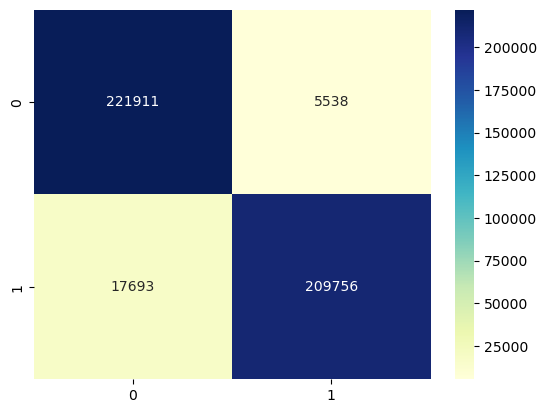

In [199]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu')
print(confusion)

In [200]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [201]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9489314087993352
Sensitivity:- 0.9222111330452102
Specificity:- 0.9756516845534603


In [202]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.97      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



In [203]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

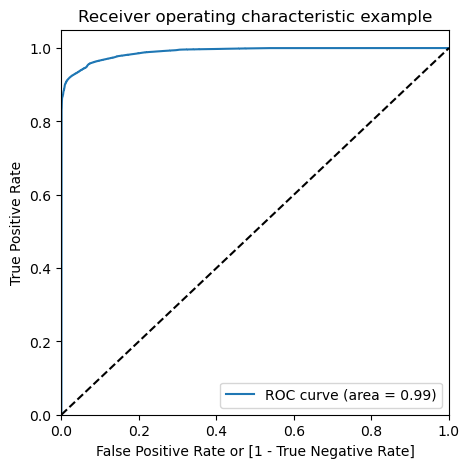

In [204]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

#### Prediction on the test set

In [205]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)

[[55416  1450]
 [   10    86]]


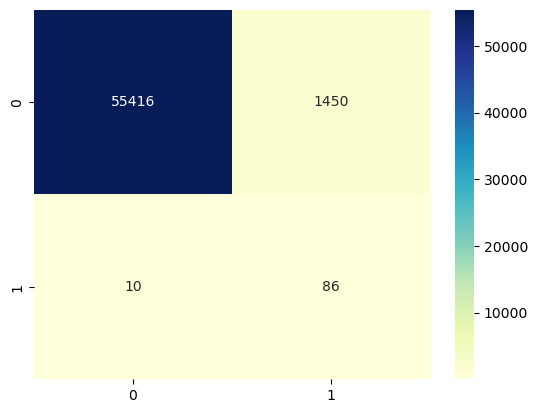

In [206]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu')
print(confusion)

In [207]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [208]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9743688774972789
Sensitivity:- 0.8958333333333334
Specificity:- 0.9745014595716245


In [209]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.06      0.90      0.11        96

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962



##### ROC on the test set

In [210]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]

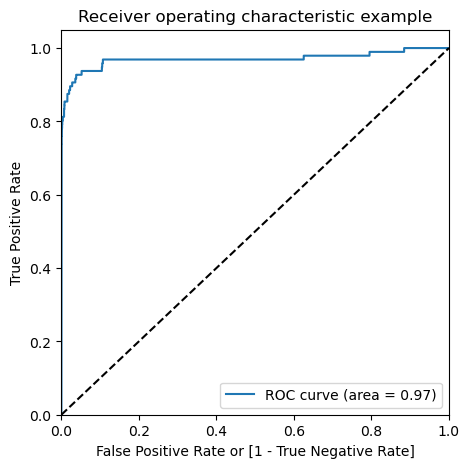

In [211]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary Logistic Regression-3***

- Train set
    - Accuracy = 0.94
    - Sensitivity = 0.92
    - Specificity = 0.97
    - ROC = 0.99
- Test set
    - Accuracy = 0.97
    - Sensitivity = 0.90
    - Specificity = 0.97
    - ROC = 0.97

### XGBoost

In [212]:
smote_hyper_parameter=Xgboost_hyper_parameter(X_train_smote,y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [213]:
# cv results
cv_results = pd.DataFrame(smote_hyper_parameter.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,5.352665,0.013697,0.235336,0.009874,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999675,0.999729,0.999679,0.999694,0.000024,4,0.999725,0.999712,0.999720,0.999719,0.000005
1,5.352654,0.010541,0.237005,0.013489,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999648,0.999719,0.999656,0.999674,0.000032,6,0.999702,0.999709,0.999721,0.999711,0.000008
2,5.762144,0.656900,0.234564,0.006056,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999657,0.999730,0.999654,0.999680,0.000035,5,0.999712,0.999714,0.999703,0.999710,0.000005
3,5.410381,0.021245,0.232335,0.004110,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999932,0.999958,0.999948,0.999946,0.000011,3,0.999967,0.999968,0.999977,0.999971,0.000005
4,5.573985,0.232058,0.233670,0.006947,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999964,0.999953,0.999957,0.999958,0.000005,1,0.999977,0.999979,0.999979,0.999978,0.000001
5,5.516679,0.373023,0.224910,0.005598,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999963,0.999949,0.999958,0.999957,0.000006,2,0.999977,0.999976,0.999981,0.999978,0.000002


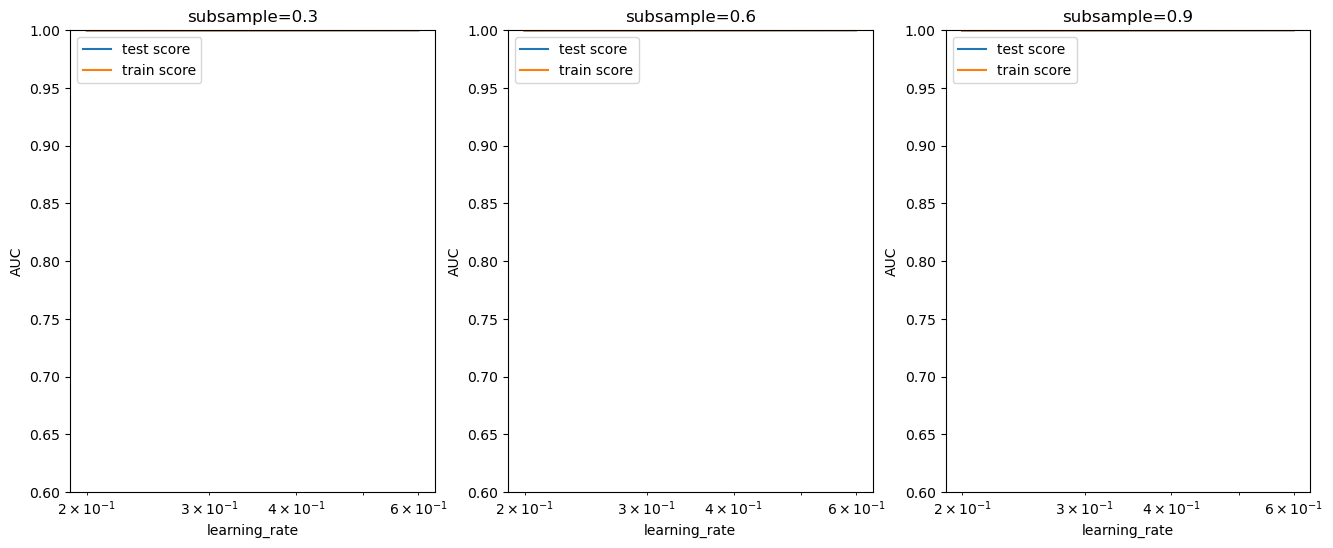

In [214]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [215]:
smote_hyper_parameter.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [216]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

##### Prediction on the train set

In [217]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

[[227448      1]
 [     0 227449]]


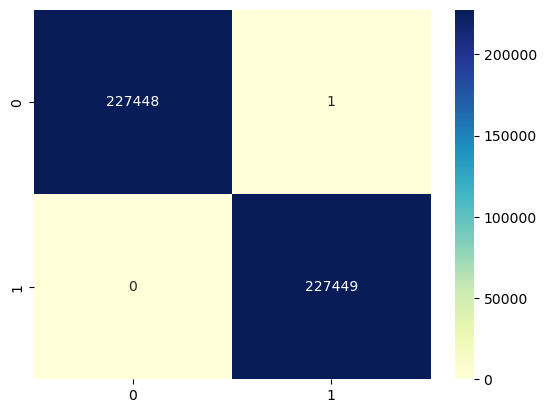

In [218]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu')
print(confusion)

In [219]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [220]:

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9999978017049976
Sensitivity:- 1.0
Specificity:- 0.9999956034099952


In [221]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [222]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [223]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.9999999890785479

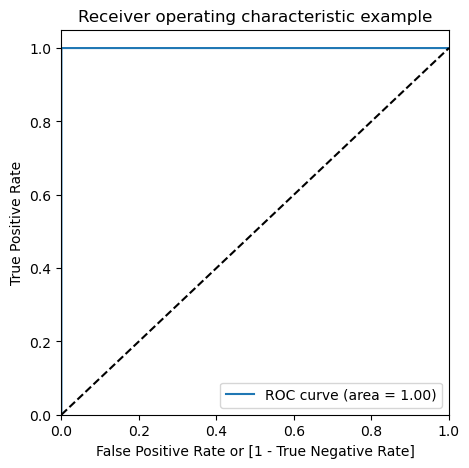

In [224]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

##### Prediction on the test set

In [225]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)

[[56833    33]
 [   20    76]]


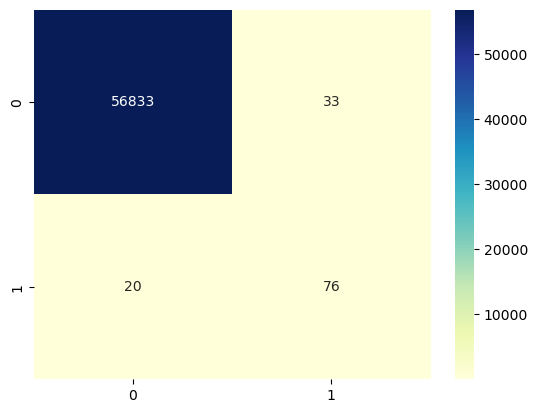

In [226]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu')
print(confusion)

In [227]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [228]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9990695551420246
Sensitivity:- 0.7916666666666666
Specificity:- 0.9994196883902507


In [229]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.70      0.79      0.74        96

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [230]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

In [231]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9553290117703608

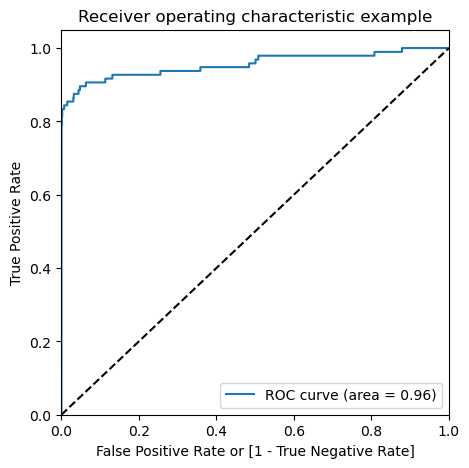

In [232]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary XGBoost-3***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 0.99
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.99
    - Sensitivity = .80
    - Specificity = 0.99
    - ROC-AUC = .96

Overall, the model is performing well in the test set, what it had learnt from the train set.

### Decision Tree

In [233]:
smote_hyper_parameter=decision_tree_parameter(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [234]:
# cv results
cv_results = pd.DataFrame(smote_hyper_parameter.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,6.647944,0.060413,0.067333,0.000943,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.986127,0.985690,0.984839,0.985552,0.000535,5
1,6.601818,0.006320,0.069333,0.002629,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.986127,0.985688,0.984838,0.985551,0.000535,6
2,6.603072,0.027833,0.068333,0.000945,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.986089,0.985642,0.984770,0.985500,0.000547,7
3,6.581076,0.010446,0.068401,0.000862,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.986066,0.985637,0.984768,0.985490,0.000540,8
4,12.060177,0.048174,0.073336,0.000474,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998148,0.998151,0.998047,0.998115,0.000048,1
5,12.089765,0.021628,0.073021,0.000030,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998146,0.998131,0.998035,0.998104,0.000049,2
6,12.056276,0.056493,0.074989,0.002140,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998089,0.998047,0.997921,0.998019,0.000071,4
7,12.049663,0.031134,0.072323,0.000480,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998106,0.998087,0.997908,0.998034,0.000089,3


In [235]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", smote_hyper_parameter.best_score_)
print(smote_hyper_parameter.best_estimator_)

Best roc_auc:- 0.9981153083651891
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [236]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [237]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

[[223809   3640]
 [  2374 225075]]


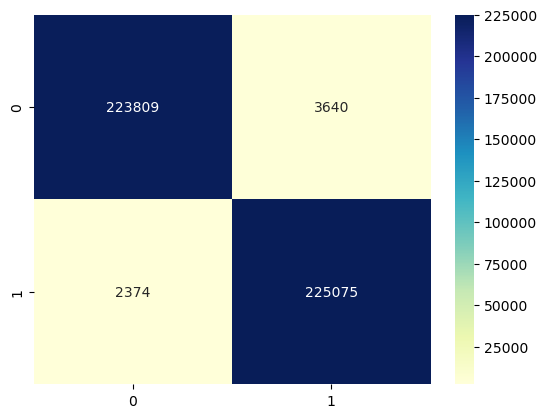

In [238]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu')
print(confusion)

In [239]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [240]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9867794538555896
Sensitivity:- 0.9895624953286232
Specificity:- 0.9839964123825561


In [241]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    227449
           1       0.98      0.99      0.99    227449

    accuracy                           0.99    454898
   macro avg       0.99      0.99      0.99    454898
weighted avg       0.99      0.99      0.99    454898



In [242]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [243]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.9986355757920081

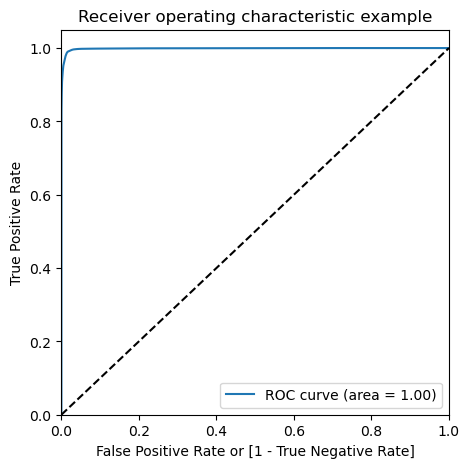

In [244]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

##### Prediction on the test set

In [245]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(X_test)

[[55852  1014]
 [   19    77]]


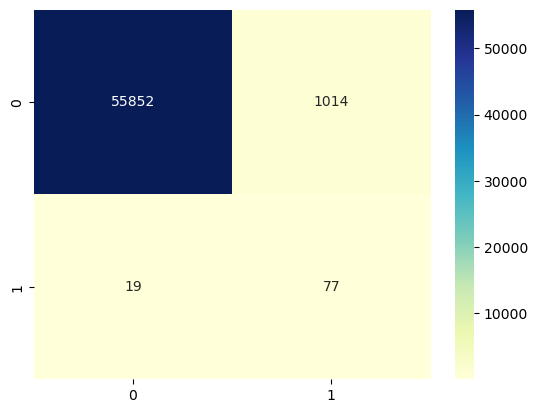

In [246]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu')
print(confusion)

In [247]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [248]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9818651030511569
Sensitivity:- 0.8020833333333334
Specificity:- 0.9821686069004326


In [249]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.07      0.80      0.13        96

    accuracy                           0.98     56962
   macro avg       0.54      0.89      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [250]:
# Predicted probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]

In [251]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.8551876157692353

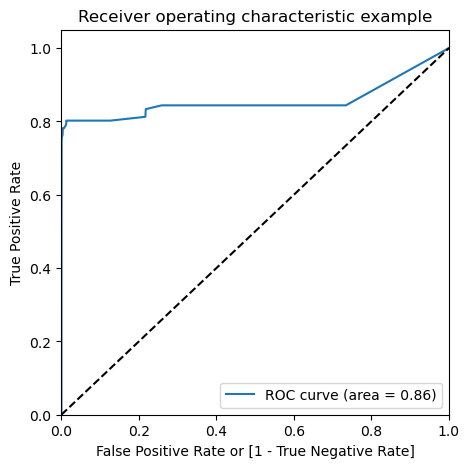

In [252]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary Decision Tree-3***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 0.97
    - Specificity = 0.98
    - ROC-AUC = 1
- Test set
    - Accuracy = 0.98
    - Sensitivity = 0.90
    - Specificity = 0.98
    - ROC-AUC = 86


## AdaSyn (Adaptive Synthetic Sampling)

In [253]:
# Importing adasyn
from imblearn.over_sampling import ADASYN

In [254]:
# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [255]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_adasyn))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227448})


In [256]:
# Splitting data into train and test set 80:20
# X_train_adasyn, X_test, y_train_adasyn, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Logistic Regression

In [257]:
adasyn_hyper_parameter=logictic_hyper_parameter(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [258]:
# results of grid search CV
cv_results = pd.DataFrame(adasyn_hyper_parameter.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.219300,0.042446,0.044218,0.007641,0.01,{'C': 0.01},0.963477,0.962841,0.963241,0.962839,...,0.963049,0.000264,6,0.962976,0.963010,0.962980,0.963321,0.963087,0.963075,0.000129
1,1.289992,0.054372,0.047203,0.004994,0.1,{'C': 0.1},0.963543,0.962952,0.963337,0.962877,...,0.963130,0.000263,5,0.963062,0.963093,0.963056,0.963401,0.963169,0.963156,0.000129
2,1.317502,0.098867,0.048404,0.002942,1,{'C': 1},0.963547,0.962962,0.963345,0.962878,...,0.963136,0.000263,4,0.963069,0.963099,0.963062,0.963406,0.963174,0.963162,0.000128
3,1.328798,0.093869,0.048104,0.002615,10,{'C': 10},0.963548,0.962963,0.963345,0.962878,...,0.963137,0.000263,3,0.963070,0.963099,0.963062,0.963407,0.963174,0.963163,0.000129
4,1.334400,0.086916,0.049002,0.004428,100,{'C': 100},0.963548,0.962963,0.963346,0.962878,...,0.963137,0.000263,2,0.963070,0.963100,0.963062,0.963407,0.963174,0.963163,0.000129
5,1.298402,0.051778,0.046401,0.004584,1000,{'C': 1000},0.963548,0.962963,0.963346,0.962878,...,0.963137,0.000263,1,0.963070,0.963100,0.963062,0.963407,0.963174,0.963163,0.000129


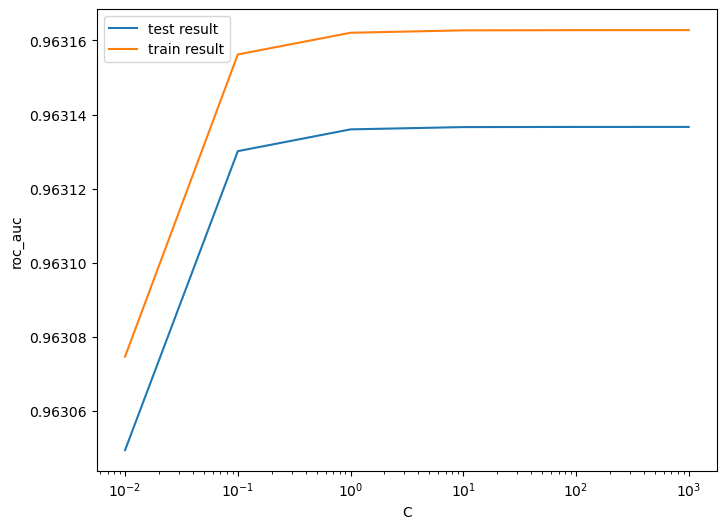

In [259]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [260]:
# Best score with best C
best_score = adasyn_hyper_parameter.best_score_
best_C = adasyn_hyper_parameter.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9631366528168902 at C = 1000


#### Logistic regression with optimal C

In [261]:
# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=1000)

In [262]:
# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

##### Prediction on the train set

In [263]:
# Predictions on the train set
y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)

[[207019  20430]
 [ 31286 196162]]


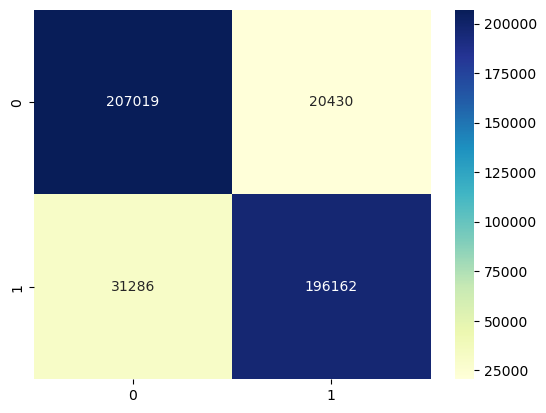

In [264]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu')
print(confusion)

In [265]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [266]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_adasyn, y_train_pred))

Accuracy:- 0.8863127257379143
Sensitivity:- 0.862447680348915
Specificity:- 0.9101776662020936
F1-Score:- 0.8835330150436899


In [267]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89    227449
           1       0.91      0.86      0.88    227448

    accuracy                           0.89    454897
   macro avg       0.89      0.89      0.89    454897
weighted avg       0.89      0.89      0.89    454897



In [268]:
# Predicted probability
y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [269]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9631610161614914

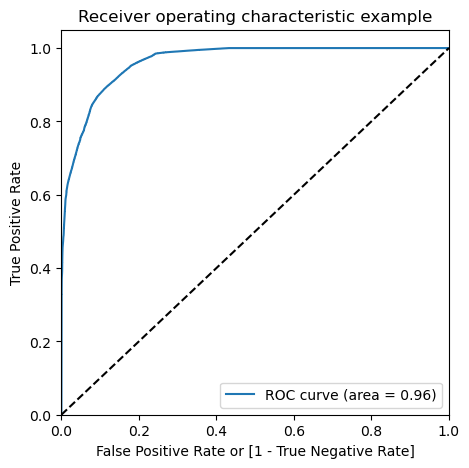

In [270]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Prediction on the test set

In [271]:
# Prediction on the test set
y_test_pred = logistic_bal_adasyn_model.predict(X_test)

[[51642  5224]
 [    4    92]]


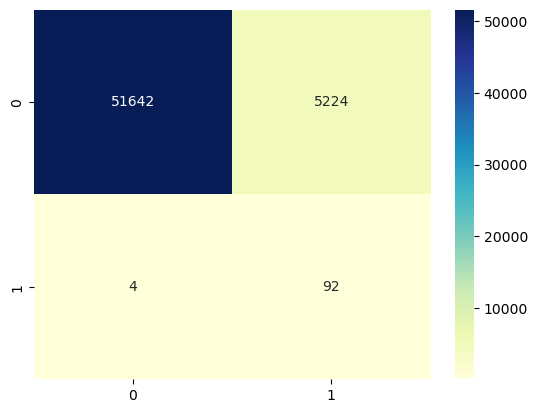

In [272]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu')
print(confusion)

In [273]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [274]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9082195147642288
Sensitivity:- 0.9583333333333334
Specificity:- 0.9081349136566665


In [275]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56866
           1       0.02      0.96      0.03        96

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962



In [276]:
# Predicted probability
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]

In [277]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9671573487086602

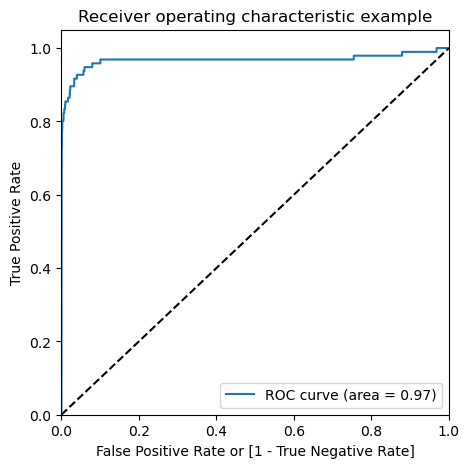

In [278]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary Logistic Regression-4***

- Train set
    - Accuracy = 0.88
    - Sensitivity = 0.86
    - Specificity = 0.91
    - ROC = 0.96
- Test set
    - Accuracy = 0.90
    - Sensitivity = 0.95
    - Specificity = 0.90
    - ROC = 0.97

### Decision Tree

In [279]:
adasyn_hyper_parameter=decision_tree_parameter(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [280]:
# cv results
cv_results = pd.DataFrame(adasyn_hyper_parameter.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,6.462069,0.031129,0.067679,0.000456,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.902958,0.920356,0.909339,0.910884,0.007186,7
1,6.469787,0.039512,0.067993,0.000807,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.902958,0.920355,0.909330,0.910881,0.007187,8
2,6.463765,0.028980,0.068686,0.001688,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.902958,0.920316,0.912920,0.912065,0.007112,5
3,6.450956,0.035061,0.067687,0.000444,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.902958,0.920316,0.912920,0.912065,0.007112,6
4,11.430282,0.191358,0.070321,0.000485,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.933887,0.946949,0.938340,0.939725,0.005422,4
5,11.487450,0.240399,0.071196,0.001826,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.935428,0.946998,0.937724,0.940050,0.005001,3
6,11.352979,0.142826,0.071345,0.001265,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.935095,0.946879,0.941461,0.941145,0.004816,2
7,11.334880,0.167406,0.071002,0.000816,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.937837,0.944829,0.943631,0.942099,0.003053,1


In [281]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", adasyn_hyper_parameter.best_score_)
print(adasyn_hyper_parameter.best_estimator_)

Best roc_auc:- 0.9420992325314486
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


In [282]:
# Model with optimal hyperparameters
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [283]:
# Predictions on the train set
y_train_pred = dt_bal_adasyn_model.predict(X_train_adasyn)

[[215929  11520]
 [  1118 226330]]


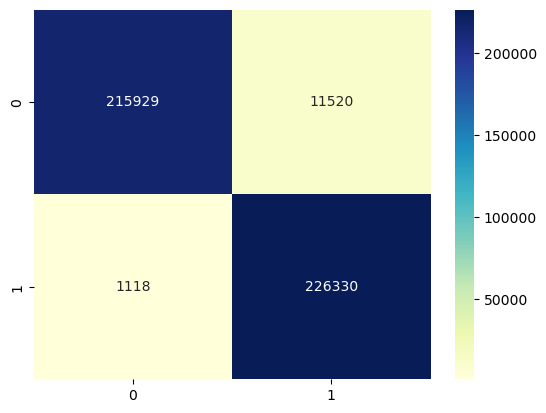

In [284]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu')
print(confusion)

In [285]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [286]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9722178866864367
Sensitivity:- 0.9950845907636031
Specificity:- 0.9493512831447929


In [287]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    227449
           1       0.95      1.00      0.97    227448

    accuracy                           0.97    454897
   macro avg       0.97      0.97      0.97    454897
weighted avg       0.97      0.97      0.97    454897



In [288]:
# Predicted probability
y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [289]:

# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9917591040224101

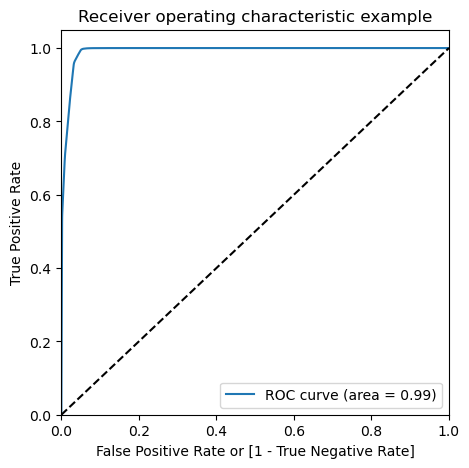

In [290]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

##### Prediction on the test set

In [291]:
# Predictions on the test set
y_test_pred = dt_bal_adasyn_model.predict(X_test)

[[53880  2986]
 [   15    81]]


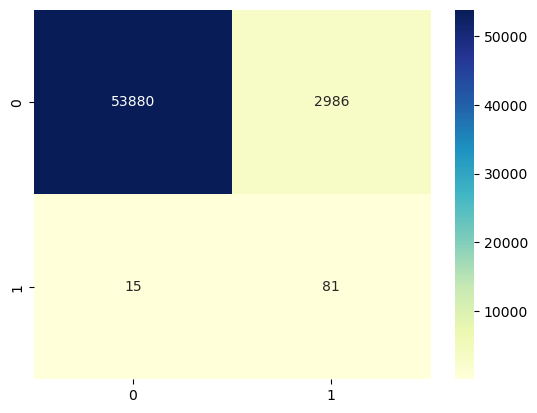

In [292]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu')
print(confusion)

In [293]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [294]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9473157543625575
Sensitivity:- 0.84375
Specificity:- 0.9474905919178419


In [295]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56866
           1       0.03      0.84      0.05        96

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.95      0.97     56962



In [296]:
# Predicted probability
y_test_pred_proba = dt_bal_adasyn_model.predict_proba(X_test)[:,1]

In [297]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9141440147305362

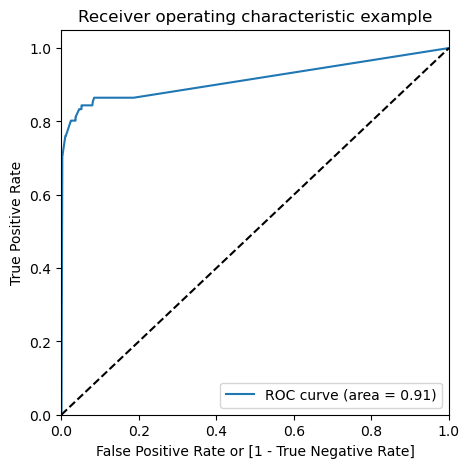

In [298]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary Decision Tree-4***

- Train set
    - Accuracy = 0.97
    - Sensitivity = 0.99
    - Specificity = 0.95
    - ROC-AUC = 0.99
- Test set
    - Accuracy = 0.94
    - Sensitivity = 0.84
    - Specificity = 0.94
    - ROC-AUC = 0.91

### XGBoost

In [299]:
adasyn_hyper_parameter=Xgboost_hyper_parameter(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [300]:
# cv results
cv_results = pd.DataFrame(adasyn_hyper_parameter.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.872651,0.386911,0.223335,0.002355,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.975484,0.996111,0.994796,0.988797,0.009429,4,0.999302,0.998994,0.999229,0.999175,0.000132
1,5.255630,0.104350,0.223335,0.002358,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.978568,0.996275,0.994438,0.989760,0.007949,2,0.999290,0.998966,0.999181,0.999146,0.000135
2,5.100968,0.024325,0.224666,0.004031,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.975494,0.995795,0.995089,0.988793,0.009408,5,0.999231,0.998957,0.999148,0.999112,0.000115
3,5.231636,0.068176,0.223677,0.008820,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.970728,0.996584,0.997243,0.988185,0.012347,6,0.999914,0.999928,0.999941,0.999928,0.000011
4,5.331328,0.084585,0.224669,0.005795,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.975766,0.996595,0.996559,0.989640,0.009810,3,0.999938,0.999926,0.999940,0.999934,0.000006
5,5.198004,0.052293,0.222349,0.002044,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.978028,0.995906,0.997311,0.990415,0.008778,1,0.999930,0.999933,0.999952,0.999938,0.000010


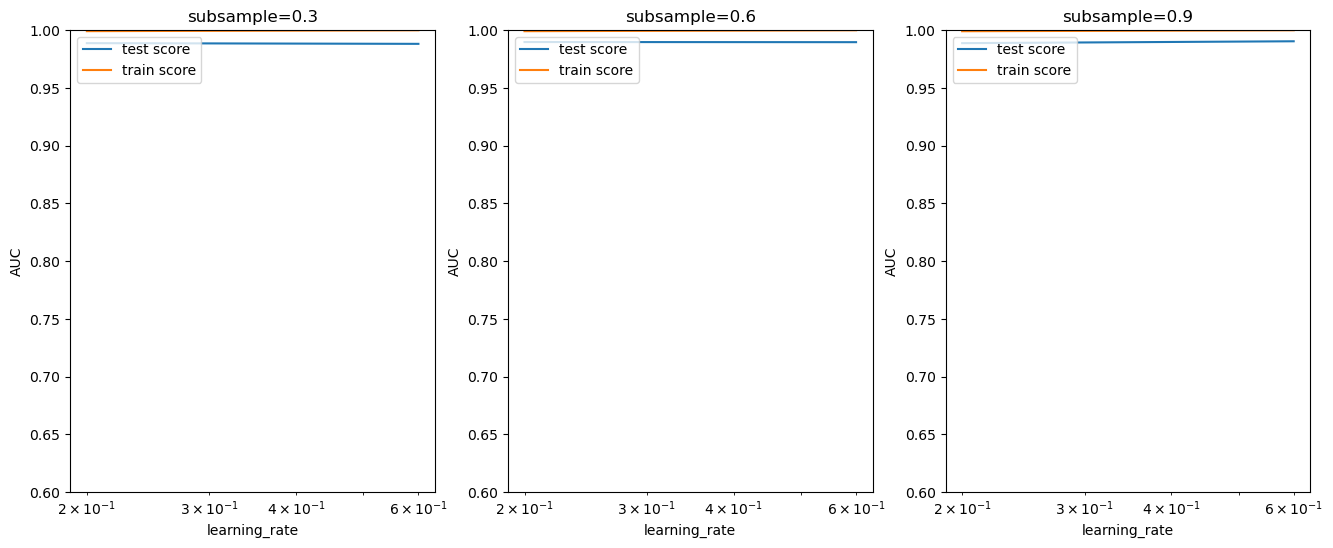

In [301]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [302]:
adasyn_hyper_parameter.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [303]:
# chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

##### Prediction on the train set

In [304]:
# Predictions on the train set
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

In [305]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_adasyn)
print(confusion)

[[227449      0]
 [     0 227448]]


In [306]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [307]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9999956034003302
Sensitivity:- 1.0
Specificity:- 1.0


In [308]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227448

    accuracy                           1.00    454897
   macro avg       1.00      1.00      1.00    454897
weighted avg       1.00      1.00      1.00    454897



In [309]:
# Predicted probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [310]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

1.0

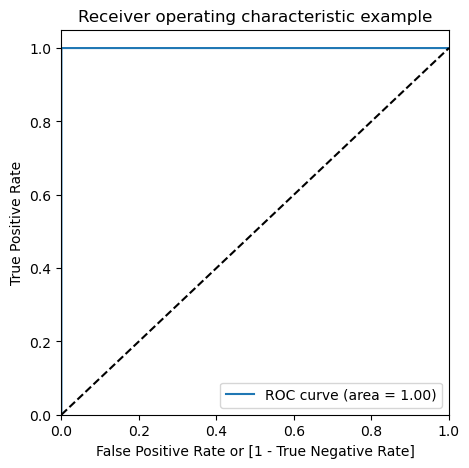

In [311]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

##### Prediction on the test set

In [312]:
# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(X_test)

In [313]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56824    42]
 [   22    74]]


In [314]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [315]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9988764439450862
Sensitivity:- 0.7708333333333334
Specificity:- 0.9992614215875919


In [316]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.64      0.77      0.70        96

    accuracy                           1.00     56962
   macro avg       0.82      0.89      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [317]:
# Predicted probability
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

In [318]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9531543086671591

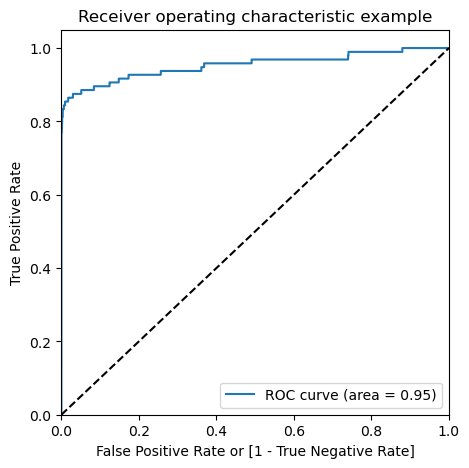

In [319]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary XGBoost-4***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 1.0
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.78
    - Specificity = 0.99
    - ROC-AUC = 0.96

### Choosing best model on the balanced data

He we balanced the data with various approach such as Undersampling, Oversampling, SMOTE and Adasy. With every data balancing thechnique we built several models such as Logistic, XGBoost, Decision Tree, and Random Forest.

We can see that almost all the models performed more or less good. But we should be interested in the best model.

Though the Undersampling technique models performed well, we should keep mind that by doing the undersampling some imformation were lost. Hence, it is better not to consider the undersampling models.

Whereas the SMOTE and Adasyn models performed well. Among those models the simplist model Logistic regression has ROC score 0.99 in the train set and 0.97 on the test set. We can consider the Logistic model as the best model to choose because of the easy interpretation of the models and also the resourse requirements to build the mdoel is lesser than the other heavy models such as Random forest or XGBoost.

Hence, we can conclude that the `Logistic regression model with SMOTE` is the best model for its simlicity and less resource requirement.

#### Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [320]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_log_bal_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_log_bal_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.9897539729615745
Threshold= 0.5311563627476331


In [321]:

import pickle

# Save the best model to a pickle file
with open('best_model.pkl', 'wb') as f:
  pickle.dump(logistic_bal_smote_model, f)


In [323]:
print(pickle.__version__)

AttributeError: module 'pickle' has no attribute '__version__'

We can see that the threshold is 0.53, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

## Cost benefit analysis
 We have noticed most of the models have performed more or less well in terms of ROC score, Precision and Recall.

But while picking the best model we should consider few things such as whether we have required infrastructure, resources or computational power to run the model or not. For the models such as Random forest, SVM, XGBoost we require heavy computational resources and eventually to build that infrastructure the cost of deploying the model increases. On the other hand the simpler model such as Logistic regression requires less computational resources, so the cost of building the model is less.

We also have to consider that for little change of the ROC score how much monetary loss of gain the bank incur. If the amount if huge then we have to consider building the complex model even though the cost of building the model is high.

## Summary to the business
For banks with smaller average transaction value, we would want high precision because we only want to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, we can add the human element to verify whether the transaction was done by calling the customer. However, when precision is low, such tasks are a burden because the human element has to be increased.

For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent. So we have to consider the losses if the missed transaction was a high-value fraudulent one.

So here, to save the banks from high-value fraudulent transactions, we have to focus on a high recall in order to detect actual fraudulent transactions.

After performing several models, we have seen that in the balanced dataset with SMOTE technique the simplest Logistic regression model has good ROC score and also high Recall. Hence, we can go with the logistic model here. It is also easier to interpret and explain to the business.

In [324]:
# prompt: how to use this pickl file

# Load the pickled model
with open('best_model.pkl', 'rb') as f:
  model = pickle.load(f)

# Make predictions on new data
new_data = X_test
predictions = model.predict(new_data)


In [325]:
confusion = metrics.confusion_matrix(y_test, predictions)
print(confusion)

[[55416  1450]
 [   10    86]]


In [326]:
accuracy_score = metrics.accuracy_score(y_test, predictions)
print("Accuracy:", accuracy_score)

Accuracy: 0.9743688774972789


In [327]:
precision= metrics.precision_score(y_test, predictions)
print("Precision:", precision)

Precision: 0.055989583333333336


In [328]:
recall= metrics.recall_score(y_test, predictions)
print("Recall:", recall)

Recall: 0.8958333333333334


In [329]:
f1_score= metrics.f1_score(y_test, predictions)
print("F1-score:", f1_score)

F1-score: 0.1053921568627451
